# BUSINESS PROBLEM


Your company (`Sillians Automobile Company`) is in the business of `second-hand vehicle sales``. It helps `owners` and `renters` predict the `price range` to value a vehicle. It helps `shoppers` plan for their car needs.

Currently, there is no easy way to do #1, #2. Owners basically browse through their listings to determine what  to value their car.

## SUGGESTED SOLUTION

As a `Software Engineer - ML`, you are tasked to `build` an `automated service` to constantly `update` a `prediction model` with happenings in the marketplace so that, at every point in time, users can get `semi-accurate` prediction of the prices of proposed cars or advice them to make price adjustments for existing ones.

Also one should also be able to predict what a car might have sold 4 months ago because the app keep tracks of the model for each time period.

The marketplace are the available car listing services.

Provide an authenticated api to access the service.

# DATA COLLECTION

Over 371528 used cars scraped with `Scrapy` from `Ebay-Kleinanzeigen`. The content of the data is in `german`, so one has to translate it first if one can not speak german. Those fields are included:
autos.csv:

* **dateCrawled:** when this ad was first crawled, all field-values are taken from this date

* **name:** `"name"` of the car

* **seller:** `private` or `dealer`.

* offerType

* **price:** the price on the ad to sell the car

* **abtest:** is simply a way for companies to test how much a particular variable affects their audience's reaction

* **vehicleType:** a vehicle type which describes the vehicle's physical properties

* **yearOfRegistration:** at which year the car was first registered

* **gearbox(transmission):** A gearbox takes the power developed from the engine and uses a series of gears to give a car more power and less speed, or less power and greater speed.

* **powerPS:** power of the car in PS (PS is the German name for `Horsepower(metric)` - `pferdestarke`.)

* **model:**  refers to the name of a car product and sometimes a range of products.

* **kilometer:** how many kilometers the car has driven.

* **monthOfRegistration:** at which month the car was first registered.

* **fuelType:** this refers to the fuel that is used to provide power to motor vehicles.

* **brand:** This is usually used to denote the manufacturer.

* **notRepairedDamage:** if the car has a damage which is not repaired yet

* **dateCreated:** the date for which the ad at ebay was created

* **nrOfPictures:** number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )

* postalCode

* **lastSeenOnline:** when the crawler saw this ad last online

#### How to go about the Problem

Here, We are building a prediction model based on the features that impact the prices the most, using a `Regression strategy`. 
where a user will be able to go through listings of the cars that are available for sale, make a decision by checking if the listed prices are on the higher or the lower side and therefore, be able to help the user/customer in the decision making to buy or sell a car, thus giving out a better model.

#### IMPORT LIBRARIES

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import arange
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

#### Reading and Understanding the Data

* Importing data using the pandas library
* Understanding the structure of the data

In [2]:
# Import data and take a view of the first 5 rows
auto_data = pd.read_csv("auto.csv", encoding='ISO-8859-1')
auto_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


This gives a clear view of what the dataset looks like, showing the Rows and Columns 

In [3]:
# The last few rows
auto_data.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [4]:
# 10 random sample
auto_data.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
38348,2016-03-31 17:48:00,Passat_35i,privat,Angebot,0,control,kombi,1996,manuell,115,NaN,150000,0,NaN,volkswagen,NaN,2016-03-31 00:00:00,0,7381,2016-04-06 11:17:52
62149,2016-04-04 18:24:11,Opel_Astra_GTC_1.6_Sport_mit_Sitzheizung/Tempo...,privat,Angebot,5890,test,limousine,2005,automatik,105,astra,100000,10,benzin,opel,nein,2016-04-04 00:00:00,0,65201,2016-04-05 12:15:22
99489,2016-03-21 22:49:43,BMW_525d_Touring_Automatik_M_Paket_Top_Ausstat...,privat,Angebot,0,control,kombi,2007,automatik,197,5er,125000,5,diesel,bmw,nein,2016-03-21 00:00:00,0,24103,2016-03-22 00:42:21
328628,2016-04-04 15:57:22,Mercedes_Benz_C_180_Kompressor_Avantgarde,privat,Angebot,1500,test,limousine,2002,manuell,143,c_klasse,150000,8,benzin,mercedes_benz,ja,2016-04-04 00:00:00,0,53572,2016-04-04 15:57:22
260868,2016-04-01 14:50:02,Ford_Mondeo_2.0_Turnier_TDCi_Trend,privat,Angebot,1000,test,kombi,2002,manuell,131,mondeo,150000,9,diesel,ford,nein,2016-04-01 00:00:00,0,65795,2016-04-07 05:15:40
280301,2016-03-31 21:56:14,BMW_318i_mit_M_Ausstattung_ab_Werk,privat,Angebot,790,test,limousine,1997,manuell,0,3er,150000,10,benzin,bmw,ja,2016-03-31 00:00:00,0,68219,2016-04-06 18:17:49
128673,2016-04-03 15:57:57,Golf_4_Cabrio_2.0_Highline___Black_Color_Conce...,privat,Angebot,3300,test,cabrio,1998,manuell,116,golf,150000,11,benzin,volkswagen,nein,2016-04-03 00:00:00,0,59846,2016-04-05 15:16:47
222601,2016-03-19 10:58:19,A_160_techn.i.O.,privat,Angebot,1700,test,NaN,2017,NaN,0,a_klasse,125000,0,NaN,mercedes_benz,NaN,2016-03-19 00:00:00,0,13125,2016-03-28 10:17:49
167026,2016-03-29 18:40:52,Alfa_Romeo_145_1.4_Twin_Spark,privat,Angebot,1250,control,limousine,1999,manuell,103,145,150000,1,benzin,alfa_romeo,nein,2016-03-29 00:00:00,0,38524,2016-04-06 04:16:17
73828,2016-03-24 10:37:41,Volkswagen_Lupo_1.4_Comfortline,privat,Angebot,999,test,kleinwagen,1998,manuell,75,lupo,150000,12,benzin,volkswagen,nein,2016-03-24 00:00:00,0,44623,2016-04-07 00:16:54


In [5]:
# The shape of our dataset (Rows, columns)
auto_data.shape

(371528, 20)

`371528` Rows and `20` Columns

We can confirm that the `scales` for the `attributes` are all over the place because of the `differing units`. We may benefit from some transforms later on.

In [6]:
# This gives us a knowledge of our dataset
# The datatype of each Feature (integer, object, float)
# The number of columns
# Incomplete data
# Missing data
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

The Information above indicates the Features of Object and integer dataType, Some of our Features have missing values.

In [7]:
# Statistical description of the int features
auto_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerPS,371528.0,115.549477,1.921396e+02,0.0,70.0,105.0,150.0,2.000000e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04


In [8]:
auto_data.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [9]:
# Total number of columns
auto_data.columns.value_counts().sum()

20

In [10]:
# Column Features
list(auto_data.columns)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen']

In [11]:
# Identify columns with missing data

auto_data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Notice that the 
* vehicleType
* gearbox
* model
* fuelType
* notRepairedDamage

all have missing values

# Missingno - Missing Data

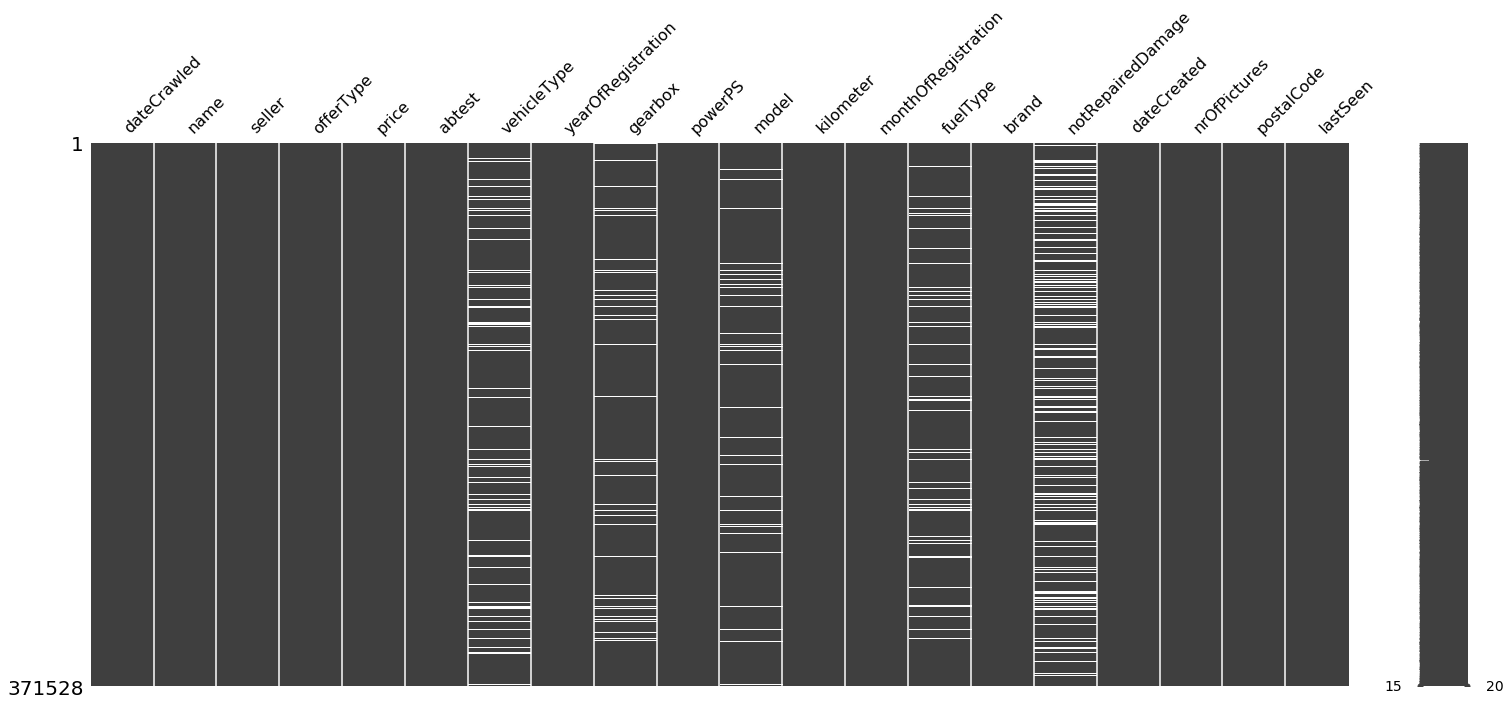

In [12]:
# A graphical view/representation of columns having missing data using missingno
import missingno as msno
msno.matrix(auto_data)
plt.show()

In [13]:
# Remove the `nrOfPictures` column, has 0 values
auto_data = auto_data.drop(['nrOfPictures'], axis=1)

## EXPLORATORY DATA ANALYSIS

Let's summarize the distribution of each attribute.

In [14]:
# descriptions, change precision to 2 places
set_option('precision', 1)
print(auto_data.describe())

         price  yearOfRegistration   powerPS  kilometer  monthOfRegistration  \
count  3.7e+05            371528.0  371528.0   371528.0             371528.0   
mean   1.7e+04              2004.6     115.5   125618.7                  5.7   
std    3.6e+06                92.9     192.1    40112.3                  3.7   
min    0.0e+00              1000.0       0.0     5000.0                  0.0   
25%    1.2e+03              1999.0      70.0   125000.0                  3.0   
50%    3.0e+03              2003.0     105.0   150000.0                  6.0   
75%    7.2e+03              2008.0     150.0   150000.0                  9.0   
max    2.1e+09              9999.0   20000.0   150000.0                 12.0   

       postalCode  
count    371528.0  
mean      50820.7  
std       25799.1  
min        1067.0  
25%       30459.0  
50%       49610.0  
75%       71546.0  
max       99998.0  


We now have a better feeling for how different the `attributes` are. The `min and max` values as well are the `means vary a lot`. We are likely going to get `better results` by `rescaling the data` in some way.

Now, let's now take a look at the `correlation` between all of the `numeric attributes`. 

In [15]:
# correlation between the Numeric attributes
set_option('precision', 2)
print(auto_data.corr(method='pearson'))

                        price  yearOfRegistration   powerPS  kilometer  \
price                1.00e+00           -1.82e-04  6.85e-03  -6.35e-04   
yearOfRegistration  -1.82e-04            1.00e+00  3.51e-04  -5.53e-02   
powerPS              6.85e-03            3.51e-04  1.00e+00  -1.07e-02   
kilometer           -6.35e-04           -5.53e-02 -1.07e-02   1.00e+00   
monthOfRegistration -2.83e-03           -1.16e-02  4.44e-02   1.84e-03   
postalCode          -3.16e-03           -1.65e-03  2.71e-02  -2.67e-02   

                     monthOfRegistration  postalCode  
price                          -2.83e-03   -3.16e-03  
yearOfRegistration             -1.16e-02   -1.65e-03  
powerPS                         4.44e-02    2.71e-02  
kilometer                       1.84e-03   -2.67e-02  
monthOfRegistration             1.00e+00    1.50e-02  
postalCode                      1.50e-02    1.00e+00  


In [16]:
pearson_corr = auto_data.corr(method='pearson')

pearson_corr

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.00e+00,-1.82e-04,6.85e-03,-6.35e-04,-2.83e-03,-3.16e-03
yearOfRegistration,-1.82e-04,1.00e+00,3.51e-04,-5.53e-02,-1.16e-02,-1.65e-03
powerPS,6.85e-03,3.51e-04,1.00e+00,-1.07e-02,4.44e-02,2.71e-02
kilometer,-6.35e-04,-5.53e-02,-1.07e-02,1.00e+00,1.84e-03,-2.67e-02
monthOfRegistration,-2.83e-03,-1.16e-02,4.44e-02,1.84e-03,1.00e+00,1.50e-02
postalCode,-3.16e-03,-1.65e-03,2.71e-02,-2.67e-02,1.50e-02,1.00e+00


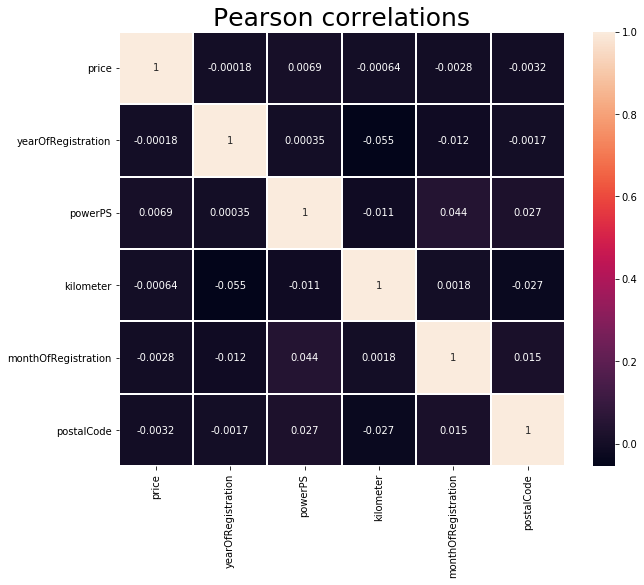

In [17]:
plt.figure(figsize = (10, 8))

sns.heatmap(pearson_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Pearson correlations', fontsize=25)

plt.show()

It is actually interesting to see that most of our Numeric Features are negatively correlated to other Numeric Features but Highly correlated to itself. I will explore more on this after transforming the Object type Features

### Data Visualization



#### Unimodal Data Visualizations

Let's look at `visualizations` of individual attributes. It is often useful to look at your data using `multiple different` visualizations in order to `spark ideas`. Let's look at `histograms` of each `attribute` to get a sense of the `data distributions`.

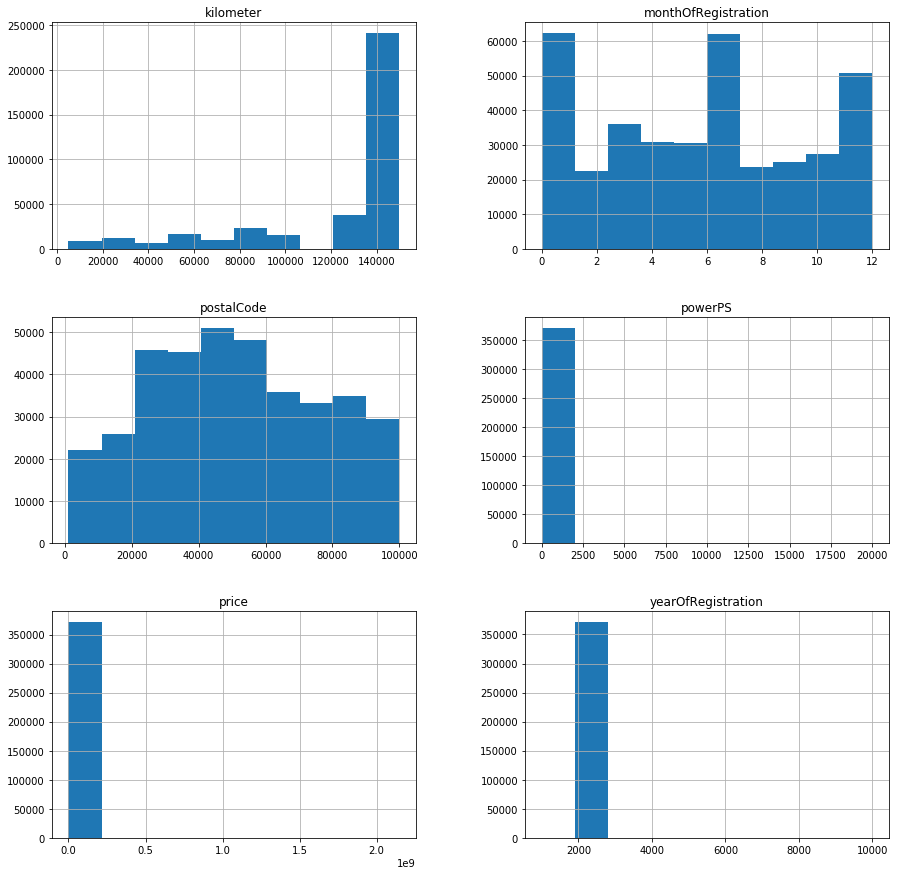

In [18]:
# histogram Distribution of Numerical Features
auto_data.hist(figsize=(15,15))
pyplot.show()

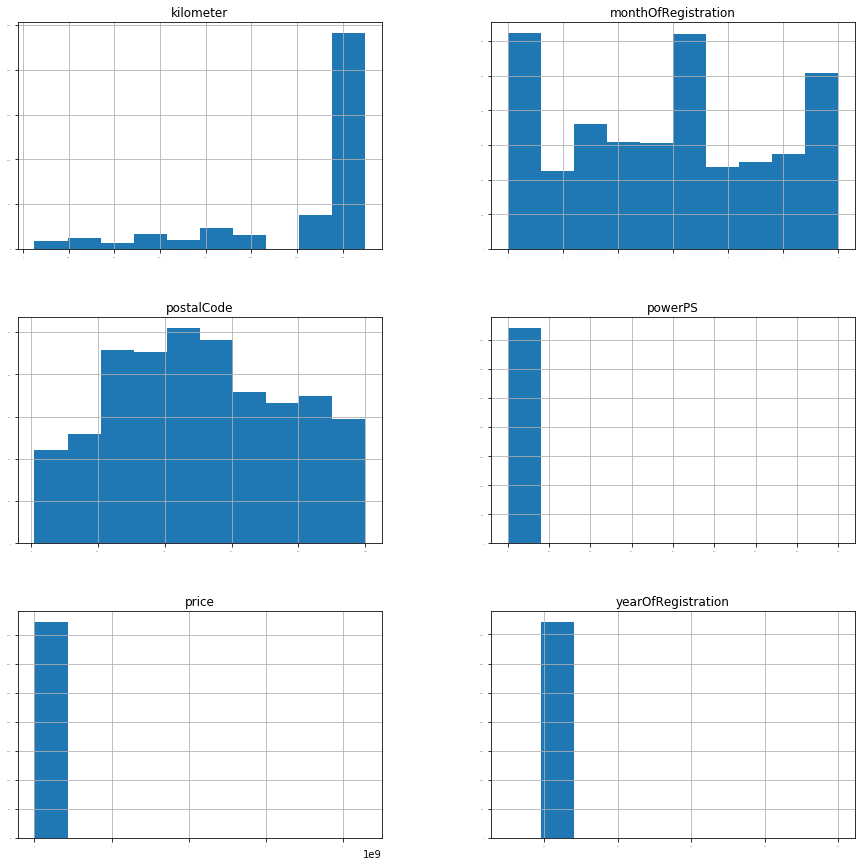

In [19]:
# histograms
auto_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,15))
pyplot.show()

`Price`, `YearOfRegistration` and `powerps` are exponentially distributed and this gives a clear view of how distributed this Numeric Features are...

Let's look at the same `distributions` using `density plots` that smooth them out a bit.

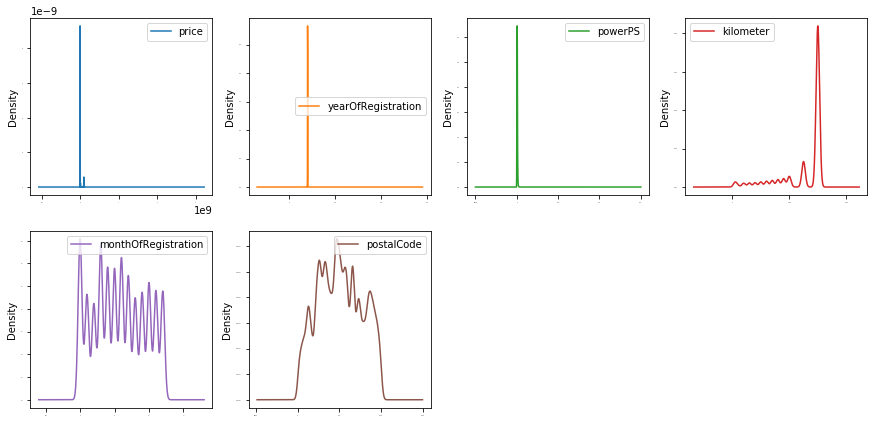

In [20]:
# density
auto_data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1, figsize=(15,15))
pyplot.show()

This perhaps adds more `evidence` to our `suspicion` about `possible exponential` and `bimodal distributions`. It also looks like `postalCode` and `monthOfRegistration` may be `skewed Gaussian distributions`.

Let's look at the data with `box and whisker` `plots` of each `attribute`.

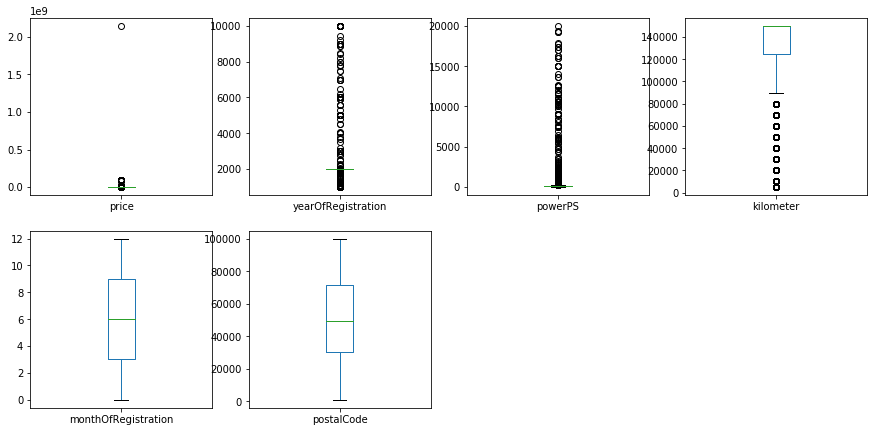

In [21]:
# box and whisker plots
auto_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
pyplot.show()

This helps point out the `skew` in many `distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots).

### Multimodal Data Visualizations

Let's look at some `visualizations` of the `interactions` between `variables`. The best place to start is a `scatter plot matrix`.

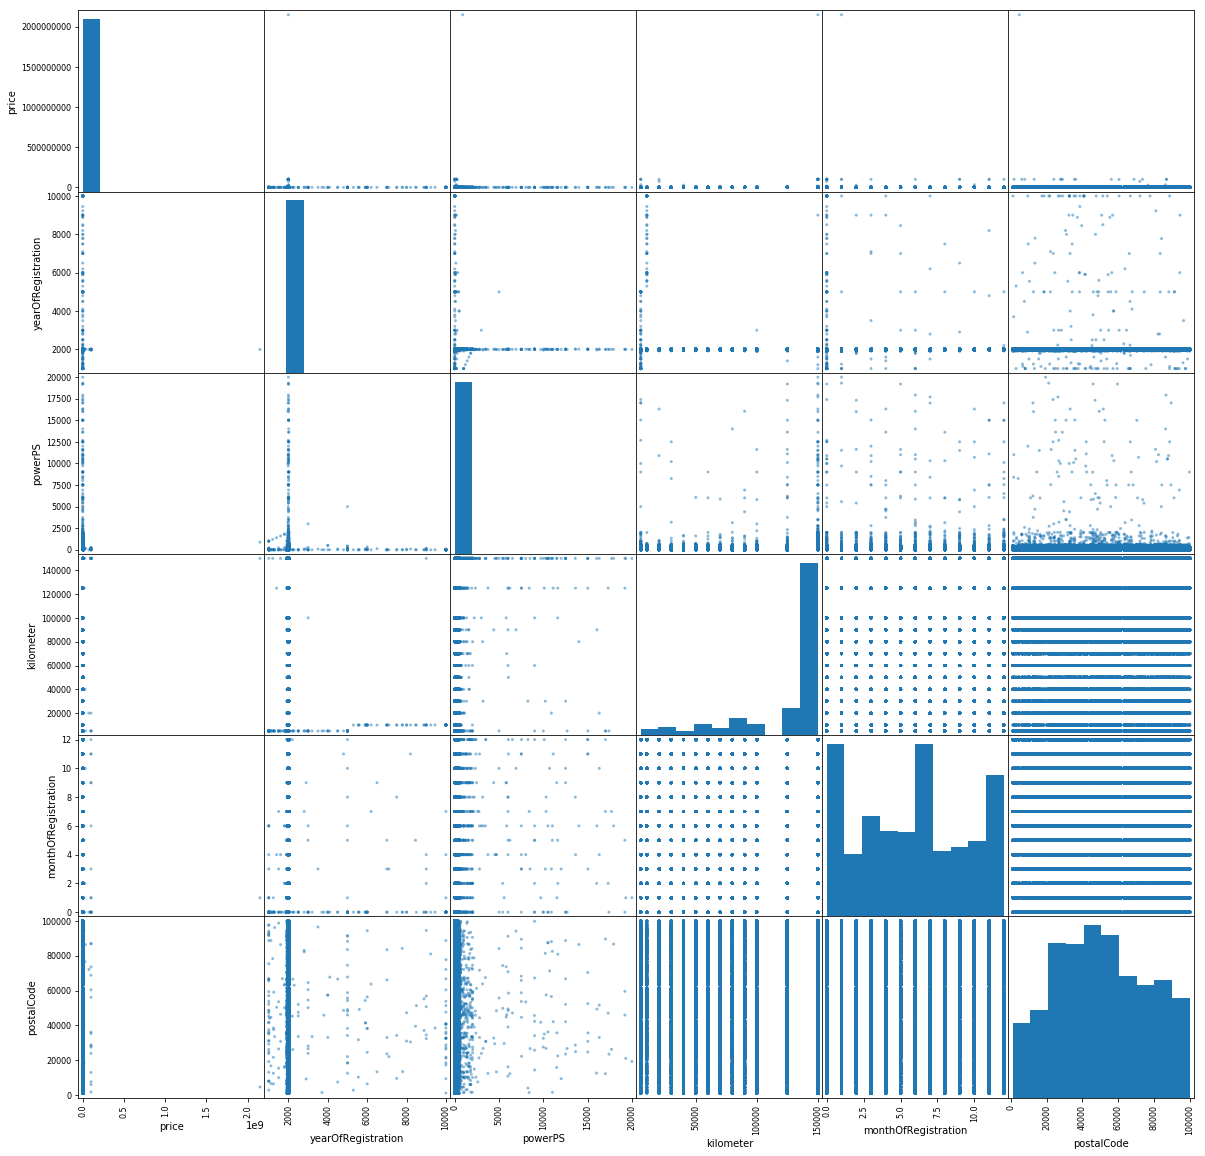

In [22]:
# scatter plot matrix
scatter_matrix(auto_data, figsize=(20, 20))
pyplot.show()

### Summary of Ideas

There is a lot of `structure` in this `dataset`. We need to think about `transforms` that we could use later to better expose the `structure` which in turn may improve `modeling accuracy`. So far it would be `worth trying`:

* Data Cleaning to remove Rows with Null values, mean imputaion for missing values 
* OneHotencoder, Labelencoder and Ordinalencoder to transform our Features having Categorical values into numeric dtype. 
* Feature selection and removing the most correlated attributes.
* Normalizing the dataset to reduce the effect of differing scales.
* Standardizing the dataset to reduce the effects of differing distributions.

With lots of additional time I would also explore the `possibility of binning` (`discretization)` of the data. This can often improve `accuracy for decision tree algorithms`.

# Data Cleaning

In [23]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
postalCode             371528 non-null int64
lastSeen               371528 non-null object
dtypes: int64(6), obj

Notice that most of our Features are of the dtype `Object` 

The default approach to dealing with missing data in most statistical software packages is listwise deletion–dropping any case with data missing on any variable involved anywhere in the analysis.  It also goes under the names case deletion and complete case analysis.

Although this approach can be really painful (you worked hard to collect those data, only to drop them!), it does work well in some situations.  By works well, I mean it fits 3 criteria:

* gives unbiased parameter estimates

* gives accurate (or at least conservative) standard error estimates

* results in adequate power.

But not always.  So over the years, a number of ad hoc approaches have been proposed to stop the bloodletting of so much data.  Although each solved some problems of listwise deletion, they created others.  All three have been discredited in recent years and should NOT be used.  They are:

`Pairwise Deletion:` use the available data for each part of an analysis.  This has been shown to result in correlations beyond the 0,1 range and other fun statistical impossibilities

`Mean Imputation:` substitute the mean of the observed values for all missing data.  There are so many problems, it’s difficult to list them all, but suffice it to say, this technique never meets the above 3 criteria.

`Dummy Variable:` create a dummy variable that indicates whether a data point is missing, then substitute any arbitrary value for the missing data in the original variable.  Use both variables in the analysis.  While it does help the loss of power, it usually leads to biased results.

There are a number of good techniques for dealing with missing data, some of which are not hard to use, and which are now available in all major stat software.  There is no reason to continue to use ad hoc techniques that create more problems than they solve.

#### Drop Rows with Null Values (This Strategy is best for our Problem)

In [24]:
auto_data = auto_data.dropna(axis=0) # Drop missing values in row-axis

In [25]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 19 columns):
dateCrawled            260956 non-null object
name                   260956 non-null object
seller                 260956 non-null object
offerType              260956 non-null object
price                  260956 non-null int64
abtest                 260956 non-null object
vehicleType            260956 non-null object
yearOfRegistration     260956 non-null int64
gearbox                260956 non-null object
powerPS                260956 non-null int64
model                  260956 non-null object
kilometer              260956 non-null int64
monthOfRegistration    260956 non-null int64
fuelType               260956 non-null object
brand                  260956 non-null object
notRepairedDamage      260956 non-null object
dateCreated            260956 non-null object
postalCode             260956 non-null int64
lastSeen               260956 non-null object
dtypes: int64(6), obj

In [26]:
auto_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,2.61e+05,260956.00,260956.00,260956.00,260956.00,260956.00
mean,8.21e+03,2003.31,126.33,124058.67,6.18,51818.71
std,3.43e+05,6.51,145.28,39848.18,3.47,25843.43
min,0.00e+00,1910.00,0.00,5000.00,0.00,1067.00
25%,1.50e+03,1999.00,78.00,100000.00,3.00,31226.00
50%,3.85e+03,2004.00,116.00,150000.00,6.00,51103.00
75%,8.60e+03,2008.00,150.00,150000.00,9.00,72766.00
max,1.00e+08,2018.00,20000.00,150000.00,12.00,99998.00


In [27]:
auto_data.shape

(260956, 19)

#### Checking Null values

In [28]:
auto_data.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType            False
yearOfRegistration     False
gearbox                False
powerPS                False
model                  False
kilometer              False
monthOfRegistration    False
fuelType               False
brand                  False
notRepairedDamage      False
dateCreated            False
postalCode             False
lastSeen               False
dtype: bool

In [29]:
# Unique enteries in each of the columns
auto_data.nunique()

dateCrawled            213628
name                   150361
seller                      2
offerType                   2
price                    5137
abtest                      2
vehicleType                 8
yearOfRegistration         89
gearbox                     2
powerPS                   608
model                     250
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      39
notRepairedDamage           2
dateCreated               107
postalCode               8082
lastSeen               135866
dtype: int64

In [30]:
auto_data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

### Qualitative Attributes

**Nominal Attributes** – related to names : The values of a Nominal attribute are name of things, some kind of symbols. Values of Nominal attributes represents some category or state and that’s why nominal attribute also referred as categorical attributes and there is no order (rank, position) among values of nominal attribute.

`I will imploy/use OrdinalEncoder/labelEncoder to transform this Data type to numeric/integer data type`


**Binary Attributes:** Binary data has only 2 values/states. For Example yes or no, affected or unaffected, true or false.
i) Symmetric : Both values are equally important (Gender).
ii) Asymmetric : Both values are not equally important (Result).

`I will imploy/use the oneHotencoder to transform this data type to numeric/integer data type`


**Ordinal Attributes:** The Ordinal Attributes contains values that have a meaningful sequence or ranking(order) between them, but the magnitude between values is not actually known, the order of values that shows what is important but don’t indicate how important it is.

`I will imploy/use the Ordinalencoder to transform this data type to numeric/integer data type`

### Quantitative Attributes

**Numeric:** A numeric attribute is quantitative because, it is a measurable quantity, represented in integer or real values. Numerical attributes are of 2 types, interval and ratio.

* i)An interval-scaled attribute has values, whose differences are interpretable, but the numerical attributes do not have the correct reference point or we can call zero point. Data can be added and subtracted at interval scale but can not be multiplied or divided.Consider a example of temperature in degrees Centigrade. If a days temperature of one day is twice than the other day we cannot say that one day is twice as hot as another day.

* ii) A ratio-scaled attribute is a numeric attribute with an fix zero-point. If a measurement is ratio-scaled, we can say of a value as being a multiple (or ratio) of another value. The values are ordered, and we can also compute the difference between values, and the mean, median, mode, Quantile-range and Five number summary can be given.

**Discrete:** Discrete data have finite values it can be numerical and can also be in categorical form. These attributes has finite or countably infinite set of values.

**Continuous:** Continuous data have infinite no of states. Continuous data is of float type. There can be many values between 2 and 3.

### Price Feature

Let's find out more about the price feature vector

In [31]:
auto_data['price']

3          1500
4          3600
5           650
6          2200
7             0
          ...  
371520     3200
371521     1150
371524     1199
371525     9200
371527    28990
Name: price, Length: 260956, dtype: int64

In [32]:
auto_data['price'].describe()

count    2.61e+05
mean     8.21e+03
std      3.43e+05
min      0.00e+00
25%      1.50e+03
50%      3.85e+03
75%      8.60e+03
max      1.00e+08
Name: price, dtype: float64

In [33]:
pd.DataFrame(auto_data.price.value_counts())

,price
1500,3481
0,3389
500,3322
2500,2912
1200,2894
...,...
25150,1
127500,1
22969,1
8630,1


The most occuring price is `1500` which has a frequency value of `3481`. The table above shows the top 5 prices of cars that are mostly in occurance and the 5 lowest occuring prices

In [44]:
auto_data['price'].replace((0,1,2,3,4,5,6,7,8,9), auto_data['price'].mean(axis=0),inplace=True)

In [45]:
auto_data['price'].value_counts()

1500.00     3481
8208.63     3389
500.00      3322
2500.00     2912
1200.00     2894
            ... 
323.00         1
2510.00        1
14430.00       1
958.00         1
384.00         1
Name: price, Length: 5133, dtype: int64

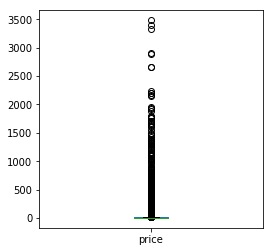

In [46]:
auto_data['price'].value_counts().plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

### IQR (Interquartile range) method
Boxplots use the IQR method to display data and outliers(shape of the data) but in order to get a list of identified outlier and to retrieve the outlier data mathematical formula should be used.

The `interquartile range` (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1

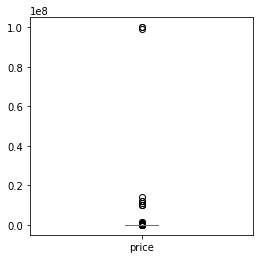

In [47]:
auto_data['price'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

From the Boxplot above we can deduce that `price` has Outlier values, I will use a mathematical strategy to get this values in order range, taking the Q1, Q2, and Q3 into consideration

In [48]:
Q1 = auto_data['price'].quantile(0.25)
Q3 = auto_data['price'].quantile(0.75)

print(Q1, Q3)

1600.0 8600.0


In [49]:
IQR = Q3 - Q1
IQR

7000.0

In [50]:
Q1 + 1.5 * IQR

12100.0

In [51]:
for index, row in auto_data.iterrows():
    
    if row['price']  > (Q1 + 1.5 * IQR):
        auto_data.at[index, 'price'] = auto_data['price'].mean(axis=0)

In [52]:
auto_data['price'].describe()

count    260956.00
mean       4385.26
std        3030.23
min          10.00
25%        1600.00
50%        3999.00
75%        6549.61
max       12100.00
Name: price, dtype: float64

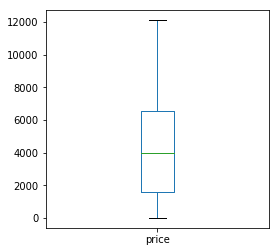

In [53]:
auto_data['price'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

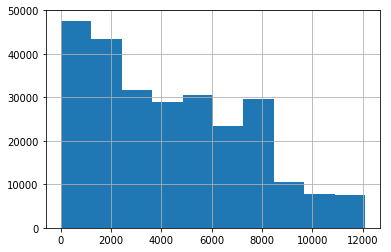

In [54]:
auto_data['price'].hist()

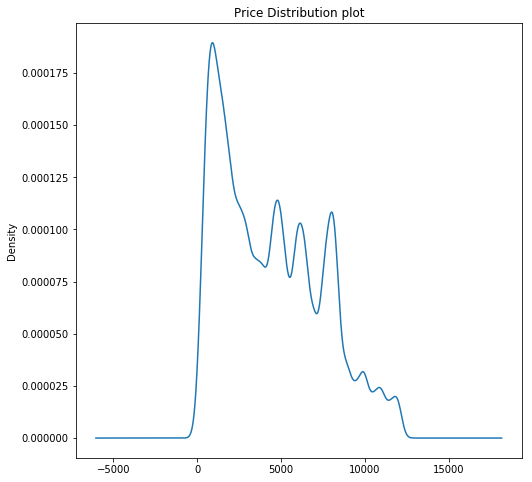

In [55]:
auto_data['price'].plot(kind = 'kde', title ='Price Distribution plot', figsize=(8, 8))

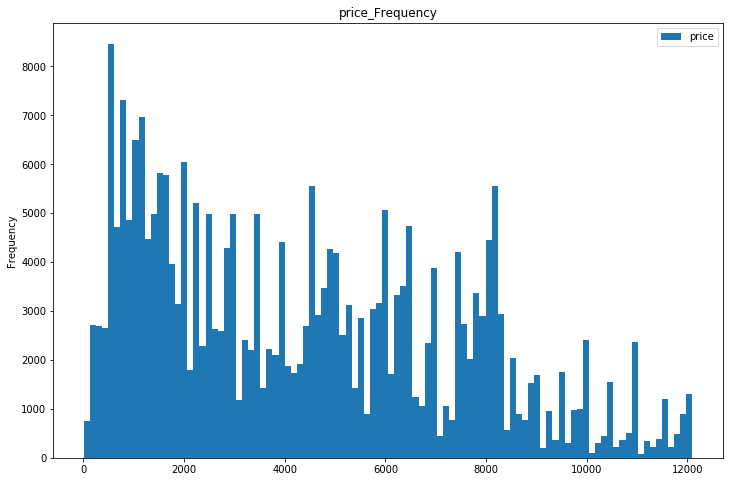

In [56]:
auto_data[['price']].plot(kind = 'hist', bins=100,
                                       title = 'price_Frequency', figsize=(12, 8))

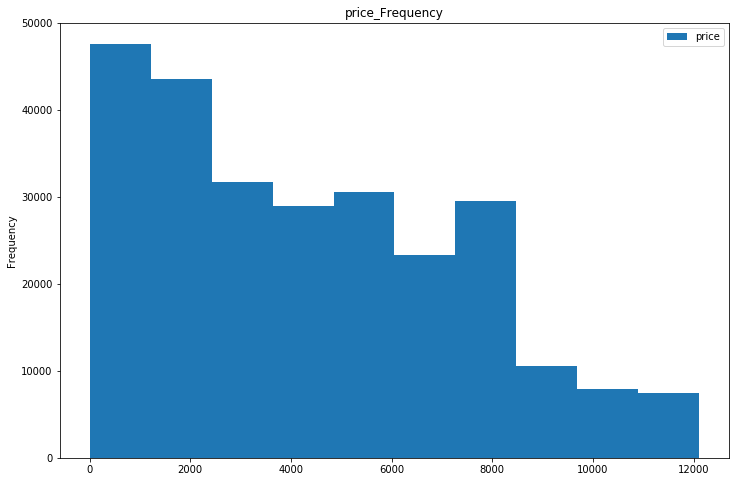

In [57]:
auto_data[['price']].plot(kind = 'hist',
                                    title = 'price_Frequency', figsize=(12, 8))

### model Feature

In [58]:
auto_data['model'].describe()

count     260956
unique       250
top         golf
freq       20958
Name: model, dtype: object

In [59]:
pd.DataFrame(auto_data['model'].value_counts())

,model
golf,20958
andere,20294
3er,15645
polo,8828
corsa,8267
...,...
elefantino,5
rangerover,4
samara,3
serie_3,3


The above shows the top 5 frequent car models and the less 5 frequent car models

In [60]:
auto_data["model"].unique()[0]

'golf'

Golf is the most frequent car model with a frequency of `20958`

In [61]:
auto_data['model'].head()

3       golf
4      fabia
5        3er
6    2_reihe
7     andere
Name: model, dtype: object

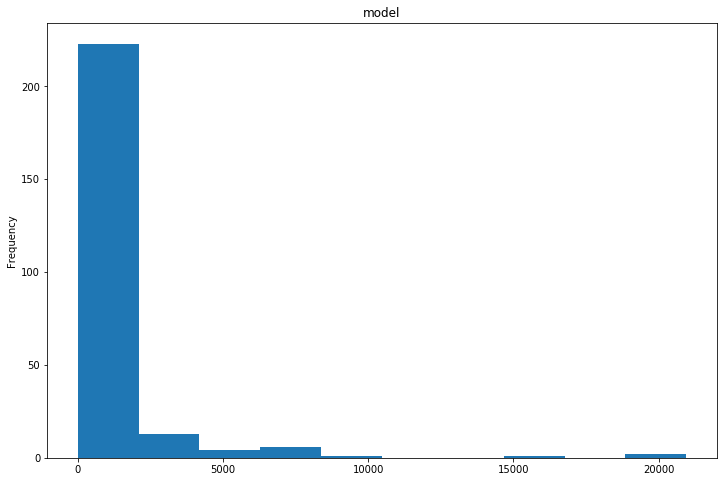

In [62]:
auto_data['model'].value_counts().plot(kind = 'hist',
                                    title = 'model', figsize=(12, 8))

In [64]:
list(auto_data['model'].unique())

['golf',
 'fabia',
 '3er',
 '2_reihe',
 'andere',
 '3_reihe',
 'passat',
 'navara',
 'twingo',
 'c_max',
 'a_klasse',
 'scirocco',
 '5er',
 'arosa',
 'civic',
 'transporter',
 'punto',
 'e_klasse',
 'one',
 'clio',
 '1er',
 'b_klasse',
 'astra',
 'fortwo',
 'a8',
 'jetta',
 'polo',
 'fiesta',
 'c_klasse',
 'micra',
 'vito',
 'sprinter',
 '156',
 'escort',
 'forester',
 'scenic',
 'a1',
 'combo',
 'focus',
 'tt',
 'a6',
 'jazz',
 'slk',
 '7er',
 '80',
 '147',
 'glk',
 'meriva',
 'z_reihe',
 'v40',
 'ibiza',
 'mustang',
 'eos',
 'a4',
 'touran',
 'getz',
 'insignia',
 'megane',
 'a3',
 'lupo',
 'r19',
 'colt',
 'corsa',
 'vectra',
 'berlingo',
 'm_klasse',
 'tiguan',
 'sharan',
 '6_reihe',
 'c4',
 'panda',
 'up',
 'i_reihe',
 'ceed',
 'kangoo',
 '5_reihe',
 'yeti',
 'octavia',
 'zafira',
 'mii',
 'rx_reihe',
 'mondeo',
 '6er',
 'fox',
 'matiz',
 'beetle',
 'rio',
 'touareg',
 'logan',
 'omega',
 'cuore',
 's_max',
 'modus',
 'a2',
 'x_reihe',
 'a5',
 'galaxy',
 'c3',
 'viano',
 's_klasse

We have `250 unique` Car `models`. As seen, the car model type is Object dtype and our Machine learning model can only take in numeric or continuous data type, knowing fully well that a car model is a very good determinant to price of the car, As stated earlier, this data type is nominal and I will use `OrdinalEncoder` to transform them to numerical form.

In [65]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [66]:
ordinal_encoder = OrdinalEncoder()
auto_data['model'] = ordinal_encoder.fit_transform(auto_data[['model']])
auto_data['model'].head(10)

3     118.0
4     103.0
5      11.0
6       8.0
7      40.0
10     10.0
11    171.0
14    161.0
17    227.0
18     61.0
Name: model, dtype: float64

In [67]:
auto_data.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07


In [68]:
auto_data.shape

(260956, 19)

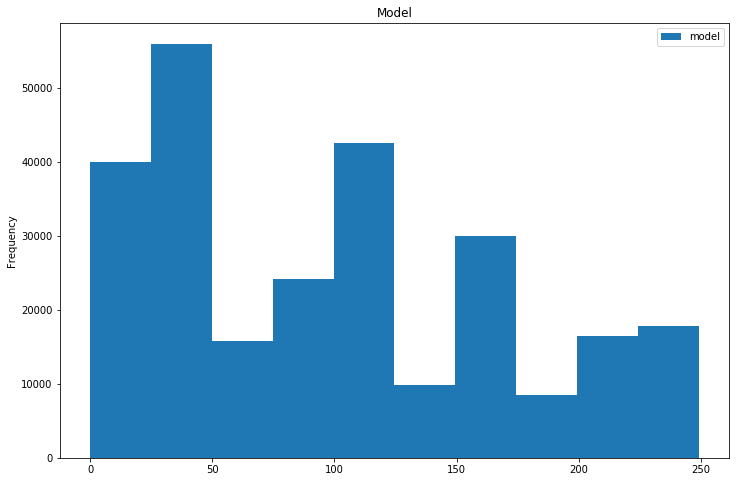

In [69]:
auto_data[['model']].plot(kind = 'hist',
                                    title = 'Model', figsize=(12, 8))

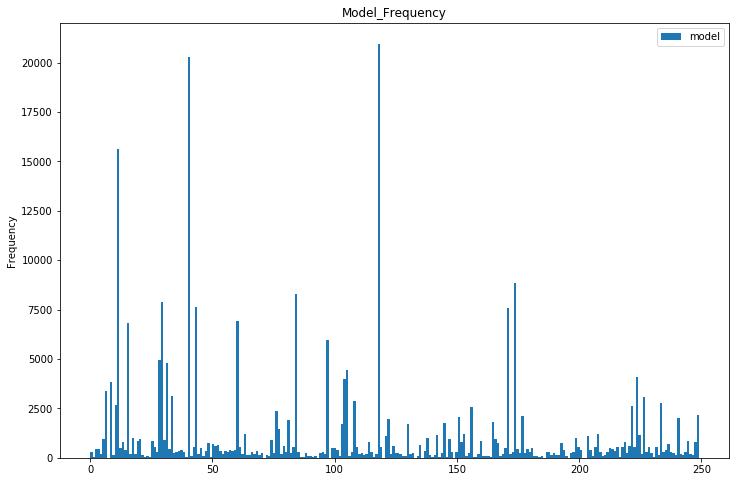

In [70]:
auto_data[['model']].plot(kind = 'hist', bins=250,
                                       title = 'Model_Frequency', figsize=(12, 8))

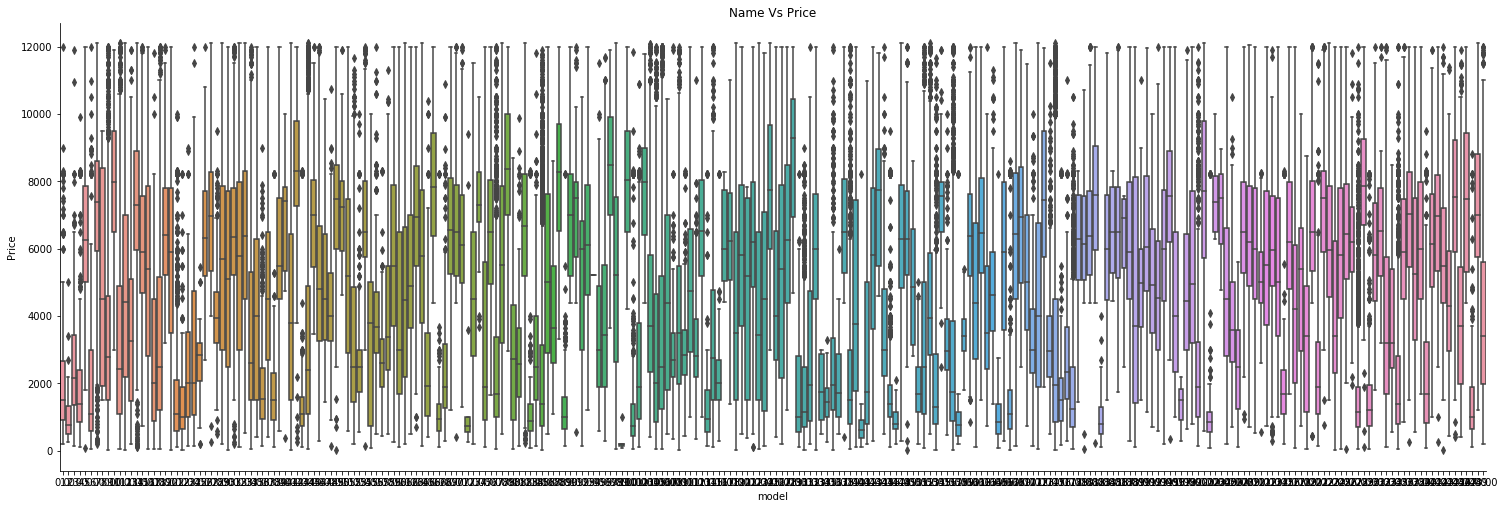

In [71]:
mx = sns.factorplot(y="price", x="model", data=auto_data, kind="box", size=7 , aspect=3)
mx.set(xlabel='model')
mx.set(ylabel= 'Price')
plt.title('Name Vs Price');
plt.show()

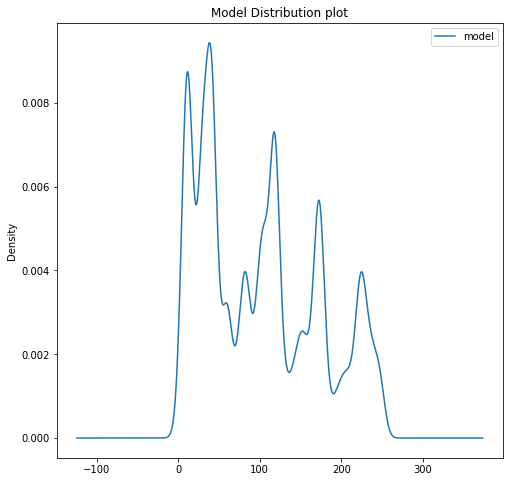

In [72]:
auto_data[['model']].plot(kind = 'kde', title ='Model Distribution plot', figsize=(8, 8))

#### Plot `model` aganist `price`

### dateCrawled Feature

In [73]:
auto_data['dateCrawled'].describe()

count                  260956
unique                 213628
top       2016-03-08 15:50:29
freq                        5
Name: dateCrawled, dtype: object

In [74]:
pd.DataFrame(auto_data['dateCrawled'].value_counts())

,dateCrawled
2016-03-08 15:50:29,5
2016-03-31 18:50:16,5
2016-03-22 14:50:05,5
2016-04-01 19:25:23,5
2016-04-03 16:49:06,5
...,...
2016-03-19 19:30:55,1
2016-04-04 12:46:25,1
2016-03-18 10:47:22,1
2016-03-23 12:58:26,1


These dates basically represent when was the ads crawled , or time of lastseen of these ads , we will not able to collect much information from these dates so it's better to remove them

In [75]:
auto_data = auto_data.drop(['dateCrawled'], axis=1)

In [76]:
auto_data.head(3)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07


In [77]:
auto_data.shape

(260956, 18)

### name  Feature

In [78]:
auto_data['name'].describe()

count       260956
unique      150361
top       BMW_318i
freq           619
Name: name, dtype: object

In [79]:
pd.DataFrame(auto_data['name'].value_counts())

,name
BMW_318i,619
Volkswagen_Golf_1.4,582
BMW_316i,516
BMW_320i,491
Volkswagen_Polo,421
...,...
Citroen_Berlingo_mit_Faltdach,1
Volvo_C30_2.0_Summum,1
Volkswagen_Lupo_1.4_16V_TÜV_2/2018_Zahnriemen_neu_Faltdach,1
Weiss_foliierter_Cayenne_S,1


In [80]:
pd.DataFrame(auto_data['name'].value_counts())

,name
BMW_318i,619
Volkswagen_Golf_1.4,582
BMW_316i,516
BMW_320i,491
Volkswagen_Polo,421
...,...
Citroen_Berlingo_mit_Faltdach,1
Volvo_C30_2.0_Summum,1
Volkswagen_Lupo_1.4_16V_TÜV_2/2018_Zahnriemen_neu_Faltdach,1
Weiss_foliierter_Cayenne_S,1


The most frequent car name is the `BMW_318i` which has a frequency value of `619`

Though this feature/column will play a major part in price prediction, but I will have to drop it since I have the `model` of the car encoded using `OrdinalEncoder` , the model feature will cover for the name column 

In [81]:
auto_data = auto_data.drop(['name'], axis=1)

In [82]:
auto_data.head(3)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,privat,Angebot,650.0,test,limousine,1995,manuell,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07


In [83]:
auto_data.shape

(260956, 17)

### seller Feature

In [84]:
auto_data['seller'].describe()

count     260956
unique         2
top       privat
freq      260954
Name: seller, dtype: object

In [85]:
pd.DataFrame(auto_data['seller'].value_counts())

,seller
privat,260954
gewerblich,2


The seller column values are `privat` means (`Private car`) and `gewerblich` means (`Commercial vehicle`), I will get rid of this column as the gewerblich value occured only three(3) times

* Drop Column `seller`

In [86]:
auto_data = auto_data.drop(['seller'], axis=1)

In [87]:
auto_data.head(3)

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,Angebot,1500.0,test,kleinwagen,2001,manuell,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,Angebot,3600.0,test,kleinwagen,2008,manuell,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,Angebot,650.0,test,limousine,1995,manuell,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07


In [88]:
auto_data.shape

(260956, 16)

### offerType Feature

In [89]:
auto_data['offerType'].describe()

count      260956
unique          2
top       Angebot
freq       260952
Name: offerType, dtype: object

In [90]:
pd.DataFrame(auto_data['offerType'].value_counts())

,offerType
Angebot,260952
Gesuch,4


* `Angebot` means `offer`
* `Gesuch` means `Application`

`Gesuch`(Application) offerType has only `4 entries`, which is not normally distributed ,we should remove this column
* Drop Column `offerType`

In [91]:
auto_data = auto_data.drop(['offerType'], axis=1)

In [92]:
auto_data.head(3)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,1500.0,test,kleinwagen,2001,manuell,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,3600.0,test,kleinwagen,2008,manuell,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,650.0,test,limousine,1995,manuell,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07


In [93]:
auto_data.shape

(260956, 15)

### abtest Feature

In [94]:
auto_data['abtest'].describe()

count     260956
unique         2
top         test
freq      135518
Name: abtest, dtype: object

In [95]:
pd.DataFrame(auto_data['abtest'].value_counts())

,abtest
test,135518
control,125438


Both values are popular , we should keep this column
* Keep Column `abtest`

Since the `abtest` column is a categorical varaible and would be useful to model our problem, we apply label encoder to transform this values to dummy variables

In [96]:
auto_data['abtest'].unique()

array(['test', 'control'], dtype=object)

In [97]:
# from sklearn.preprocessing import LabelEncoder 

# label_encoder = LabelEncoder()

In [98]:
auto_data = pd.get_dummies(auto_data, columns=['abtest'])

In [99]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,abtest_control,abtest_test
3,1500.0,kleinwagen,2001,manuell,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1
4,3600.0,kleinwagen,2008,manuell,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1
5,650.0,limousine,1995,manuell,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1


In [100]:
auto_data.abtest_control.value_counts()

0    135518
1    125438
Name: abtest_control, dtype: int64

In [101]:
auto_data.abtest_test.value_counts()

1    135518
0    125438
Name: abtest_test, dtype: int64

In [102]:
auto_data.shape

(260956, 16)

### vehicleType Feature

In [103]:
auto_data['vehicleType'].describe()

count        260956
unique            8
top       limousine
freq          76394
Name: vehicleType, dtype: object

In [104]:
pd.DataFrame(auto_data['vehicleType'].value_counts())

,vehicleType
limousine,76394
kleinwagen,59103
kombi,53442
bus,24963
cabrio,18549
coupe,14651
suv,12082
andere,1772


`Limousine` is the most used vehicleType with a frequency count of `76394`

In [105]:
auto_data['vehicleType'].unique()

array(['kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

Some of the vehicleType values are in German, will replace them with their equivalent English translations
* kleinwagen == small car
* limousine == limousine
* cabrio == cabrio
* kombi == combi 
* suv == suv
* bus == bus
* coupe  == coupe 
* andere == others

In [106]:
auto_data['vehicleType'] = auto_data['vehicleType'].replace({'kleinwagen': 'smallCar', 'limousine': 'limousine',
                                                            'cabrio': 'cabrio', 'kombi': 'combi', 'suv': 'suv',
                                                            'bus': 'bus', 'coupe': 'coupe', 'andere': 'others'})
pd.DataFrame(auto_data['vehicleType'].value_counts())

,vehicleType
limousine,76394
smallCar,59103
combi,53442
bus,24963
cabrio,18549
coupe,14651
suv,12082
others,1772


From the Frequency table above, `limousine` is the most occuring vehicleType with `76394` frequency count

In [107]:
auto_data['vehicleType'].dtype

dtype('O')

The vehicleType is a major indicator of vehicle price, and thus has to be transformed using `OrdinalEncoder`.

In [108]:
ordinal_encoder = OrdinalEncoder()
auto_data['vehicleType'] = ordinal_encoder.fit_transform(auto_data[['vehicleType']])
auto_data['vehicleType'].head(10)

3     6.0
4     6.0
5     4.0
6     1.0
7     4.0
10    4.0
11    2.0
14    7.0
17    6.0
18    0.0
Name: vehicleType, dtype: float64

In [109]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,abtest_control,abtest_test
3,1500.0,6.0,2001,manuell,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1
4,3600.0,6.0,2008,manuell,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1
5,650.0,4.0,1995,manuell,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1


In [110]:
auto_data.shape

(260956, 16)

In [111]:
# auto_vehicleType = auto_data[['vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_combi', 'vehicleType_coupe', 
#                              'vehicleType_limousine', 'vehicleType_others', 'vehicleType_smallCar', 'vehicleType_suv']]

### yearOfRegistration Feature

In [112]:
auto_data['yearOfRegistration'].describe()

count    260956.00
mean       2003.31
std           6.51
min        1910.00
25%        1999.00
50%        2004.00
75%        2008.00
max        2018.00
Name: yearOfRegistration, dtype: float64

In [113]:
pd.DataFrame(auto_data['yearOfRegistration'].value_counts())

,yearOfRegistration
2006,16803
1999,16095
2005,15959
2004,15707
2003,15565
...,...
1947,1
1948,1
1949,1
1929,1


Majority of the cars where registered in the `Year 2016` with a total of `16803`

In [114]:
auto_data['yearOfRegistration'].unique()

array([2001, 2008, 1995, 2004, 1980, 2005, 2011, 2007, 2009, 2002, 1997,
       1990, 1981, 2003, 1984, 1999, 1998, 2012, 2014, 2006, 2010, 2000,
       1993, 2013, 1994, 1991, 1996, 1989, 2015, 1968, 1992, 1983, 1959,
       1973, 1969, 1971, 1987, 1988, 1967, 2016, 1986, 1985, 1965, 1945,
       1974, 1979, 1982, 1978, 1976, 1972, 1977, 1966, 1975, 1970, 1937,
       1963, 1936, 1954, 1961, 1962, 1960, 1951, 1964, 1953, 1957, 1958,
       1956, 2017, 1950, 1955, 1948, 1932, 1952, 1931, 2018, 1949, 1942,
       1910, 1923, 1930, 1943, 1938, 1941, 1934, 1919, 1939, 1929, 1933,
       1947], dtype=int64)

The `yearofRegistration` column and values looks good for our analysis

In [115]:
# make a plot(bar) of yearOfRegistration against price

### gearbox Feature

In [116]:
auto_data['gearbox'].describe()

count      260956
unique          2
top       manuell
freq       200059
Name: gearbox, dtype: object

In [117]:
pd.DataFrame(auto_data['gearbox'].value_counts())

,gearbox
manuell,200059
automatik,60897


Replace the German words with the English translation 
* manuell == manual
* automatik == automatic

In [118]:
# Replace the German words with their English translation
auto_data['gearbox'] = auto_data['gearbox'].replace({'manuell': 'manual', 'automatik': 'automatic'})

In [119]:
pd.DataFrame(auto_data['gearbox'].value_counts())

,gearbox
manual,200059
automatic,60897


It happens that most of the cars are manual with a frequency number of `200059`

Perform Feature Engineering to transform the values to dummy variables

In [120]:
auto_data = pd.get_dummies(auto_data, columns=['gearbox'])

In [121]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual
3,1500.0,6.0,2001,75,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1,0,1
4,3600.0,6.0,2008,69,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1,0,1
5,650.0,4.0,1995,102,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1,0,1


In [122]:
auto_data.shape

(260956, 17)

In [123]:
auto_gearbox = auto_data[['gearbox_automatic', 'gearbox_manual']]

In [124]:
auto_gearbox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 2 columns):
gearbox_automatic    260956 non-null uint8
gearbox_manual       260956 non-null uint8
dtypes: uint8(2)
memory usage: 12.5 MB


In [125]:
# make a plot(bar) of gearbox as aganist price and maybe other Features

### powerPS

PS is the German name for `Horsepower(metric)` - `pferdestarke`.

In [126]:
auto_data['powerPS'].describe()

count    260956.00
mean        126.33
std         145.28
min           0.00
25%          78.00
50%         116.00
75%         150.00
max       20000.00
Name: powerPS, dtype: float64

In [127]:
pd.DataFrame(auto_data['powerPS'].value_counts())

,powerPS
75,16370
150,11828
140,11076
60,10651
0,9800
...,...
1433,1
462,1
1230,1
2200,1


The most used or popular `PS` or `HorsePower` is the `75PS` which has a frequency of `16370`

We have rows with zero `0` values, I will use the Mean Imputation to replace them

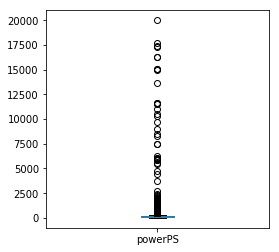

In [128]:
auto_data['powerPS'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

There seems to be Outliers in powerPS features, as seen in the Box and Whiskers plot, an average horsepower/powerPS of the Feature is `126`, the `Q3` is `150`, but with the above plot, there seems to be too much outlier lying below and above the Q1 and Q3.

In [129]:
auto_data['powerPS'].replace((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),
                             auto_data['powerPS'].mean(axis=0),inplace=True)

In [130]:
auto_data['powerPS'].describe()

count    260956.00
mean        131.13
std         143.10
min          21.00
25%          88.00
50%         120.00
75%         150.00
max       20000.00
Name: powerPS, dtype: float64

In [131]:
Q1 = auto_data['powerPS'].quantile(0.25)
Q3 = auto_data['powerPS'].quantile(0.75)

print(Q1, Q3)

88.0 150.0


In [132]:
IQR = Q3 - Q1
IQR

62.0

In [133]:
Q3 * 17

2550.0

In [134]:
auto_data['powerPS'].median()

120.0

In [135]:
for index, row in auto_data.iterrows():
    
    if row['powerPS']  > (Q3 * 17):
        auto_data.at[index, 'powerPS'] = auto_data['powerPS'].mean(axis=0)

In [136]:
auto_data['powerPS'].describe()

count    260956.00
mean        129.81
std          67.15
min          21.00
25%          88.00
50%         120.00
75%         150.00
max        2402.00
Name: powerPS, dtype: float64

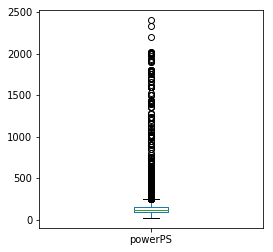

In [137]:
auto_data['powerPS'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

### kilometer Feature

It's simply an average of the fuel you've spent while driving your automobile, car, SUV, motorcycle, etc.

In [138]:
auto_data['kilometer'].describe()

count    260956.00
mean     124058.67
std       39848.18
min        5000.00
25%      100000.00
50%      150000.00
75%      150000.00
max      150000.00
Name: kilometer, dtype: float64

In [139]:
pd.DataFrame(auto_data['kilometer'].value_counts())

,kilometer
150000,161236
125000,28761
100000,11995
90000,9934
80000,8907
70000,7974
60000,7229
50000,6368
40000,5364
30000,4945


In [140]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual
3,1500.0,6.0,2001,75.0,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1,0,1
4,3600.0,6.0,2008,69.0,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1,0,1
5,650.0,4.0,1995,102.0,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1,0,1


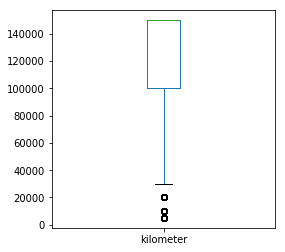

In [141]:
auto_data['kilometer'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

### monthOfRegistration Features

In [142]:
auto_data['monthOfRegistration'].describe()

count    260956.00
mean          6.18
std           3.47
min           0.00
25%           3.00
50%           6.00
75%           9.00
max          12.00
Name: monthOfRegistration, dtype: float64

In [143]:
pd.DataFrame(auto_data['monthOfRegistration'].value_counts())

,monthOfRegistration
3,28159
6,24847
4,23474
5,22933
7,21735
10,20801
9,19293
11,19258
12,19095
1,18582


This shows the different months of car Registration

In [144]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual
3,1500.0,6.0,2001,75.0,118.0,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1,0,1
4,3600.0,6.0,2008,69.0,103.0,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1,0,1
5,650.0,4.0,1995,102.0,11.0,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1,0,1


### fuelType Features

In [145]:
auto_data['fuelType'].describe()

count     260956
unique         7
top       benzin
freq      169242
Name: fuelType, dtype: object

In [146]:
pd.DataFrame(auto_data['fuelType'].value_counts())

,fuelType
benzin,169242
diesel,86974
lpg,3937
cng,460
hybrid,213
andere,73
elektro,57


We have 7 Unique values for our `fuelType` column, which we would transform using labelenconder to dummy variables
But before then I need to replace these German words with their equivalent English translation


* benzin == petrol
* diesel == diesel
* lpg == LiquefiedPetroleumGas
* cng == CompressedNaturalGas
* hybrid == hybrid
* andere == other
* elektro == electro

In [147]:
auto_data['fuelType'] = auto_data['fuelType'].replace({'benzin': 'petrol', 'diesel': 'diesel', 'lpg': 'LiquefiedPetroleumGas',
                                                      'cng': 'CompressedNaturalGas', 'hybrid': 'hybrid', 
                                                      'andere': 'other', 'elektro': 'electro'})
pd.DataFrame(auto_data['fuelType'].value_counts())

,fuelType
petrol,169242
diesel,86974
LiquefiedPetroleumGas,3937
CompressedNaturalGas,460
hybrid,213
other,73
electro,57


From the Table above `petrol` is the most used fuelType with a frequency count of `169242`

In [148]:
# Feature Engineering
ordinal_encoder = OrdinalEncoder()
auto_data['fuelType'] = ordinal_encoder.fit_transform(auto_data[['fuelType']])
auto_data['fuelType'].head(10)

3     6.0
4     2.0
5     6.0
6     6.0
7     6.0
10    6.0
11    2.0
14    2.0
17    6.0
18    2.0
Name: fuelType, dtype: float64

In [149]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual
3,1500.0,6.0,2001,75.0,118.0,150000,6,6.0,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1,0,1
4,3600.0,6.0,2008,69.0,103.0,90000,7,2.0,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1,0,1
5,650.0,4.0,1995,102.0,11.0,150000,10,6.0,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1,0,1


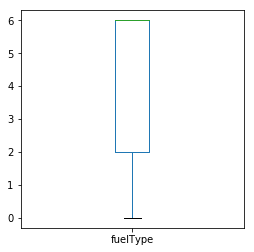

In [150]:
auto_data['fuelType'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

In [151]:
auto_data['fuelType'].describe()

count    260956.00
mean          4.58
std           1.94
min           0.00
25%           2.00
50%           6.00
75%           6.00
max           6.00
Name: fuelType, dtype: float64

### brand Feature

In [152]:
auto_data['brand'].describe()

count         260956
unique            39
top       volkswagen
freq           54194
Name: brand, dtype: object

In [153]:
pd.DataFrame(auto_data['brand'].value_counts())

,brand
volkswagen,54194
bmw,30331
mercedes_benz,26906
opel,26390
audi,24772
ford,17447
renault,11672
peugeot,7851
fiat,6365
seat,5017


From the table above, `volkswagen` is the most used `car brand` with a frequency count of  `54194`

We have  39 unique brands of cars which is a great determinant for car prediction, Will perform Feature Engineering on this column to get their dummy variables

In [154]:
# Feature Engineering 
ordinal_encoder = OrdinalEncoder()
auto_data['brand'] = ordinal_encoder.fit_transform(auto_data[['brand']])
auto_data['brand'].head(10)

3     37.0
4     31.0
5      2.0
6     25.0
7     37.0
10    19.0
11    37.0
14    23.0
17    27.0
18    10.0
Name: brand, dtype: float64

In [155]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual
3,1500.0,6.0,2001,75.0,118.0,150000,6,6.0,37.0,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1,0,1
4,3600.0,6.0,2008,69.0,103.0,90000,7,2.0,31.0,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1,0,1
5,650.0,4.0,1995,102.0,11.0,150000,10,6.0,2.0,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1,0,1


In [156]:
auto_data.shape

(260956, 17)

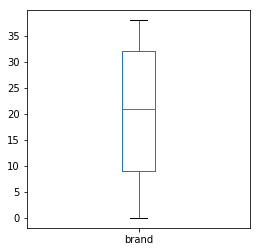

In [157]:
auto_data['brand'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4, 4))
pyplot.show()

### notRepairedDamage Feature

In [158]:
auto_data['notRepairedDamage'].describe()

count     260956
unique         2
top         nein
freq      232946
Name: notRepairedDamage, dtype: object

In [159]:
pd.DataFrame(auto_data['notRepairedDamage'].value_counts())

,notRepairedDamage
nein,232946
ja,28010


This has two unique values, the German words are translated as
* nein == No
* ja == Yes

I will replace the German word with the English translation

In [160]:
auto_data['notRepairedDamage'] = auto_data['notRepairedDamage'].replace({'nein': 'no', 'ja': 'yes'})

In [161]:
auto_data['notRepairedDamage'].value_counts()

no     232946
yes     28010
Name: notRepairedDamage, dtype: int64

In [162]:
# Feature Engineering using dummy variables
auto_data = pd.get_dummies(auto_data, columns=['notRepairedDamage'])

In [163]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes
3,1500.0,6.0,2001,75.0,118.0,150000,6,6.0,37.0,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,0,1,0,1,1,0
4,3600.0,6.0,2008,69.0,103.0,90000,7,2.0,31.0,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,0,1,0,1,1,0
5,650.0,4.0,1995,102.0,11.0,150000,10,6.0,2.0,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,0,1,0,1,0,1


In [164]:
auto_data.shape

(260956, 18)

### dateCreated  Feature

In [165]:
auto_data['dateCreated'].describe()

count                  260956
unique                    107
top       2016-04-03 00:00:00
freq                    10319
Name: dateCreated, dtype: object

In [166]:
auto_data['dateCreated'].value_counts()

2016-04-03 00:00:00    10319
2016-04-04 00:00:00    10084
2016-03-12 00:00:00     9562
2016-03-20 00:00:00     9495
2016-03-21 00:00:00     9266
                       ...  
2015-08-07 00:00:00        1
2015-03-20 00:00:00        1
2015-10-14 00:00:00        1
2015-09-09 00:00:00        1
2016-01-14 00:00:00        1
Name: dateCreated, Length: 107, dtype: int64

In [167]:
auto_data['dateCreated'] = pd.to_datetime(auto_data['dateCreated'])

auto_data.sort_values(by='dateCreated', inplace=True)

auto_data.reset_index(inplace=True, drop=True)

In [168]:
auto_data['dateCreated'] = auto_data['dateCreated'].apply(lambda d: d.to_pydatetime())

In [169]:
auto_data['Weekday_Created'] = auto_data['dateCreated'].apply(lambda d: d.isoweekday())
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created
0,6000.00,0.0,1995,200.0,40.0,150000,0,6.0,3.0,2015-03-20,24558,2016-04-07 03:45:01,0,1,1,0,1,0,5
1,7690.79,1.0,2005,163.0,208.0,150000,6,6.0,20.0,2015-08-07,76228,2016-04-07 09:15:23,1,0,0,1,1,0,5
2,5200.00,1.0,2006,109.0,8.0,80000,11,6.0,25.0,2015-08-10,26382,2016-04-05 20:46:54,1,0,0,1,1,0,1


In [170]:
import datetime
extract_year = lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").year

In [171]:
auto_data['Year_Created'] = auto_data['dateCreated'].apply(extract_year)

auto_data.sample(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created
234704,750.0,4.0,1998,60.0,174.0,150000,7,6.0,37.0,2016-04-02,22547,2016-04-07 07:16:22,0,1,0,1,1,0,6,2016
223565,950.0,2.0,1997,75.0,118.0,150000,11,6.0,37.0,2016-04-01,48155,2016-04-05 13:17:25,0,1,0,1,1,0,5,2016
33077,1399.0,6.0,2002,54.0,108.0,150000,7,6.0,32.0,2016-03-09,13593,2016-03-23 09:18:19,0,1,1,0,1,0,3,2016


In [172]:
extract_month = lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").month

In [173]:
auto_data['Month_Created'] = auto_data['dateCreated'].apply(extract_month)

auto_data.sample(5)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,...,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
139597,3100.0,2.0,2002,150.0,31.0,150000,10,6.0,1.0,2016-03-22,...,2016-04-06 16:44:28,1,0,0,1,1,0,2,2016,3
151947,9999.0,2.0,2017,102.0,28.0,90000,8,6.0,1.0,2016-03-24,...,2016-04-03 02:45:47,0,1,0,1,1,0,4,2016,3
112236,6990.0,2.0,2005,150.0,28.0,150000,7,6.0,1.0,2016-03-19,...,2016-03-27 12:17:55,1,0,1,0,1,0,6,2016,3
27841,1999.0,2.0,2000,193.0,29.0,150000,8,6.0,1.0,2016-03-08,...,2016-04-07 06:17:06,1,0,1,0,1,0,2,2016,3
162422,11900.0,4.0,2010,105.0,28.0,125000,6,2.0,1.0,2016-03-25,...,2016-04-06 22:45:49,0,1,0,1,1,0,5,2016,3


Drop the `dateCreated` column

In [174]:
auto_data = auto_data.drop(['dateCreated'], axis=1)

In [175]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
0,6000.00,0.0,1995,200.0,40.0,150000,0,6.0,3.0,24558,2016-04-07 03:45:01,0,1,1,0,1,0,5,2015,3
1,7690.79,1.0,2005,163.0,208.0,150000,6,6.0,20.0,76228,2016-04-07 09:15:23,1,0,0,1,1,0,5,2015,8
2,5200.00,1.0,2006,109.0,8.0,80000,11,6.0,25.0,26382,2016-04-05 20:46:54,1,0,0,1,1,0,1,2015,8


In [176]:
# auto_data = auto_data.drop(['Date_Created'], axis=1)

In [177]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,lastSeen,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
0,6000.00,0.0,1995,200.0,40.0,150000,0,6.0,3.0,24558,2016-04-07 03:45:01,0,1,1,0,1,0,5,2015,3
1,7690.79,1.0,2005,163.0,208.0,150000,6,6.0,20.0,76228,2016-04-07 09:15:23,1,0,0,1,1,0,5,2015,8
2,5200.00,1.0,2006,109.0,8.0,80000,11,6.0,25.0,26382,2016-04-05 20:46:54,1,0,0,1,1,0,1,2015,8


### postalCode Feature

In [178]:
auto_data['postalCode'].describe()

count    260956.00
mean      51818.71
std       25843.43
min        1067.00
25%       31226.00
50%       51103.00
75%       72766.00
max       99998.00
Name: postalCode, dtype: float64

In [179]:
auto_data['postalCode'].value_counts()

10115    803
65428    423
60311    252
66333    230
38518    227
        ... 
38528      1
12625      1
96196      1
67749      1
92705      1
Name: postalCode, Length: 8082, dtype: int64

In [180]:
auto_data = auto_data.drop(['postalCode'], axis=1)

In [181]:
auto_data.shape

(260956, 19)

### lastSeen Feature

In [182]:
auto_data['lastSeen'].describe()

count                  260956
unique                 135866
top       2016-04-07 06:45:59
freq                       16
Name: lastSeen, dtype: object

In [183]:
auto_data['lastSeen'].value_counts()

2016-04-07 06:45:59    16
2016-04-07 07:46:47    15
2016-04-07 13:17:48    15
2016-04-06 05:45:43    15
2016-04-07 04:16:03    14
                       ..
2016-03-21 04:42:11     1
2016-03-20 07:51:20     1
2016-03-22 09:45:40     1
2016-04-01 09:37:41     1
2016-03-09 05:46:49     1
Name: lastSeen, Length: 135866, dtype: int64

These dates basically represent when was the ads crawled , or time of lastseen of these ads , we will not able to collect much information from these dates so I will get rid of this column

In [184]:
auto_data = auto_data.drop(['lastSeen'], axis=1)

In [185]:
auto_data.head(3)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
0,6000.00,0.0,1995,200.0,40.0,150000,0,6.0,3.0,0,1,1,0,1,0,5,2015,3
1,7690.79,1.0,2005,163.0,208.0,150000,6,6.0,20.0,1,0,0,1,1,0,5,2015,8
2,5200.00,1.0,2006,109.0,8.0,80000,11,6.0,25.0,1,0,0,1,1,0,1,2015,8


In [186]:
auto_data.head(5)

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
0,6000.00,0.0,1995,200.0,40.0,150000,0,6.0,3.0,0,1,1,0,1,0,5,2015,3
1,7690.79,1.0,2005,163.0,208.0,150000,6,6.0,20.0,1,0,0,1,1,0,5,2015,8
2,5200.00,1.0,2006,109.0,8.0,80000,11,6.0,25.0,1,0,0,1,1,0,1,2015,8
3,600.00,6.0,2005,54.0,174.0,150000,1,6.0,37.0,0,1,0,1,0,1,5,2015,9
4,600.00,6.0,2005,54.0,174.0,150000,1,6.0,37.0,0,1,0,1,0,1,5,2015,9


In [187]:
auto_data.shape

(260956, 18)

In [188]:
list(auto_data.columns)

['price',
 'vehicleType',
 'yearOfRegistration',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'abtest_control',
 'abtest_test',
 'gearbox_automatic',
 'gearbox_manual',
 'notRepairedDamage_no',
 'notRepairedDamage_yes',
 'Weekday_Created',
 'Year_Created',
 'Month_Created']

### Final Visualization and Feature Selection/Importance

`Correlation` can be 
* `positive` (increase in one value of feature increases the value of the target variable) or 
* `negative` (increase in one value of feature decreases the value of the target variable)

`Heatmap` makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [189]:
pearson_corr = auto_data.corr(method='pearson')

pearson_corr

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
price,1.00e+00,-1.58e-01,5.07e-01,3.69e-01,-1.75e-02,-3.41e-01,4.14e-02,-2.70e-01,-1.02e-01,1.59e-03,-1.59e-03,2.23e-01,-2.23e-01,2.29e-01,-2.29e-01,1.77e-02,-2.76e-03,1.62e-02
vehicleType,-1.58e-01,1.00e+00,-2.72e-02,-2.07e-01,1.49e-03,-1.01e-01,-3.87e-03,2.24e-01,4.47e-02,-2.10e-03,2.10e-03,-4.87e-02,4.87e-02,-1.79e-02,1.79e-02,-3.29e-03,-1.39e-03,-9.20e-03
yearOfRegistration,5.07e-01,-2.72e-02,1.00e+00,1.85e-01,6.25e-02,-3.95e-01,3.35e-02,-2.90e-01,-4.12e-02,1.55e-03,-1.55e-03,1.15e-01,-1.15e-01,1.43e-01,-1.43e-01,9.97e-03,-4.09e-03,5.12e-03
powerPS,3.69e-01,-2.07e-01,1.85e-01,1.00e+00,-1.12e-01,-2.13e-02,2.15e-02,-1.58e-01,-2.79e-01,3.49e-03,-3.49e-03,4.12e-01,-4.12e-01,6.24e-02,-6.24e-02,-6.43e-03,-2.77e-04,5.58e-03
model,-1.75e-02,1.49e-03,6.25e-02,-1.12e-01,1.00e+00,-2.83e-02,1.84e-03,-4.84e-02,4.76e-01,-2.55e-03,2.55e-03,-4.07e-02,4.07e-02,-7.80e-04,7.80e-04,-1.03e-03,-9.02e-04,-5.84e-04
kilometer,-3.41e-01,-1.01e-01,-3.95e-01,-2.13e-02,-2.83e-02,1.00e+00,-6.26e-03,-1.21e-01,-2.54e-02,3.59e-03,-3.59e-03,-4.14e-02,4.14e-02,-1.06e-01,1.06e-01,-1.53e-02,5.89e-03,-6.53e-03
monthOfRegistration,4.14e-02,-3.87e-03,3.35e-02,2.15e-02,1.84e-03,-6.26e-03,1.00e+00,-5.16e-02,-8.03e-03,4.31e-04,-4.31e-04,2.60e-02,-2.60e-02,4.67e-02,-4.67e-02,3.60e-03,2.12e-03,-2.86e-03
fuelType,-2.70e-01,2.24e-01,-2.90e-01,-1.58e-01,-4.84e-02,-1.21e-01,-5.16e-02,1.00e+00,5.18e-02,-5.30e-04,5.30e-04,-1.73e-01,1.73e-01,-4.15e-02,4.15e-02,8.32e-03,-2.71e-03,4.17e-03
brand,-1.02e-01,4.47e-02,-4.12e-02,-2.79e-01,4.76e-01,-2.54e-02,-8.03e-03,5.18e-02,1.00e+00,-4.83e-03,4.83e-03,-1.27e-01,1.27e-01,-3.10e-03,3.10e-03,7.17e-03,-3.77e-04,2.32e-05
abtest_control,1.59e-03,-2.10e-03,1.55e-03,3.49e-03,-2.55e-03,3.59e-03,4.31e-04,-5.30e-04,-4.83e-03,1.00e+00,-1.00e+00,-6.41e-04,6.41e-04,-1.68e-03,1.68e-03,-8.12e-02,-3.71e-04,-3.24e-02


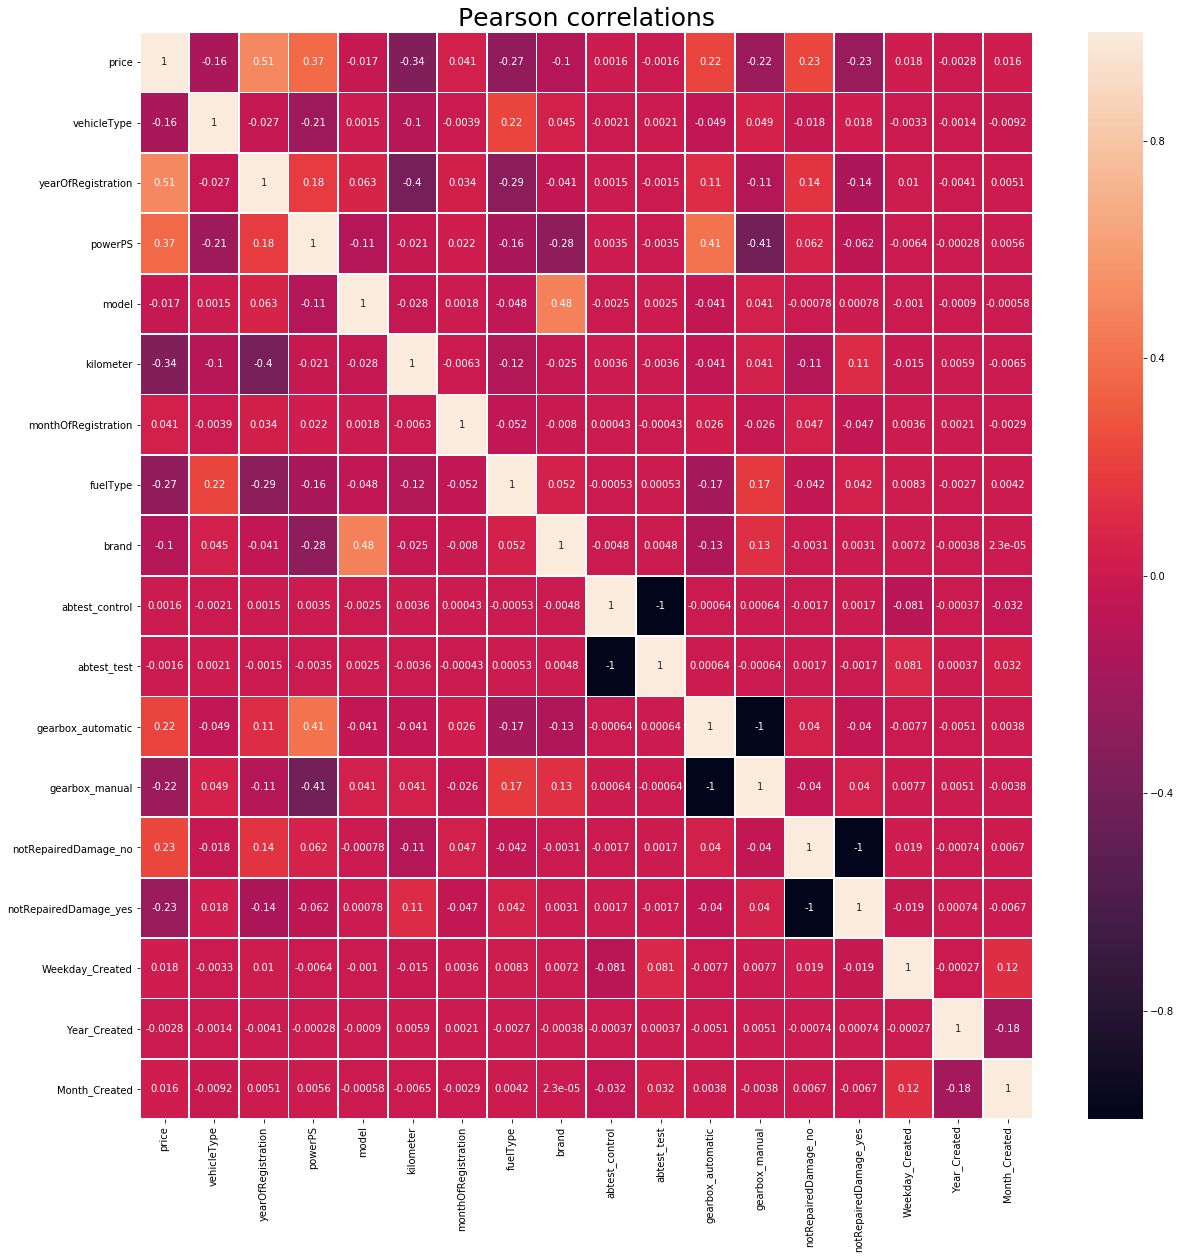

In [190]:
plt.figure(figsize = (20, 20))

sns.heatmap(pearson_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Pearson correlations', fontsize=25)

plt.show()

In [191]:
spearman_corr = auto_data.corr(method='spearman')

spearman_corr

,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
price,1.00e+00,-1.74e-01,6.64e-01,4.70e-01,-4.09e-02,-3.61e-01,4.57e-02,-2.88e-01,-1.09e-01,1.20e-03,-1.20e-03,2.33e-01,-2.33e-01,2.61e-01,-2.61e-01,1.93e-02,-2.81e-03,1.87e-02
vehicleType,-1.74e-01,1.00e+00,-3.82e-02,-3.28e-01,4.25e-02,-1.13e-01,-3.71e-03,2.17e-01,5.25e-02,-2.18e-03,2.18e-03,-5.31e-02,5.31e-02,-1.82e-02,1.82e-02,-3.45e-03,-1.56e-03,-1.04e-02
yearOfRegistration,6.64e-01,-3.82e-02,1.00e+00,2.49e-01,4.29e-02,-4.86e-01,2.80e-02,-3.16e-01,-4.77e-02,8.66e-04,-8.66e-04,1.37e-01,-1.37e-01,1.70e-01,-1.70e-01,1.27e-02,-3.85e-03,5.52e-03
powerPS,4.70e-01,-3.28e-01,2.49e-01,1.00e+00,-1.87e-01,3.09e-02,2.60e-02,-2.72e-01,-3.51e-01,5.60e-03,-5.60e-03,4.27e-01,-4.27e-01,7.03e-02,-7.03e-02,-5.04e-03,4.82e-04,7.23e-03
model,-4.09e-02,4.25e-02,4.29e-02,-1.87e-01,1.00e+00,-4.26e-02,1.68e-04,-2.73e-02,5.26e-01,-2.70e-03,2.70e-03,-4.67e-02,4.67e-02,-2.96e-03,2.96e-03,-3.33e-04,-1.07e-03,-1.13e-03
kilometer,-3.61e-01,-1.13e-01,-4.86e-01,3.09e-02,-4.26e-02,1.00e+00,-9.55e-03,-1.42e-01,-2.46e-02,3.92e-03,-3.92e-03,-3.49e-02,3.49e-02,-1.16e-01,1.16e-01,-1.81e-02,4.44e-03,-5.78e-03
monthOfRegistration,4.57e-02,-3.71e-03,2.80e-02,2.60e-02,1.68e-04,-9.55e-03,1.00e+00,-5.01e-02,-8.95e-03,3.54e-04,-3.54e-04,2.58e-02,-2.58e-02,4.50e-02,-4.50e-02,3.72e-03,2.13e-03,-2.48e-03
fuelType,-2.88e-01,2.17e-01,-3.16e-01,-2.72e-01,-2.73e-02,-1.42e-01,-5.01e-02,1.00e+00,5.46e-02,-6.12e-04,6.12e-04,-1.73e-01,1.73e-01,-4.09e-02,4.09e-02,8.28e-03,-2.64e-03,4.06e-03
brand,-1.09e-01,5.25e-02,-4.77e-02,-3.51e-01,5.26e-01,-2.46e-02,-8.95e-03,5.46e-02,1.00e+00,-4.41e-03,4.41e-03,-1.42e-01,1.42e-01,-4.35e-03,4.35e-03,6.93e-03,-1.54e-04,-1.73e-04
abtest_control,1.20e-03,-2.18e-03,8.66e-04,5.60e-03,-2.70e-03,3.92e-03,3.54e-04,-6.12e-04,-4.41e-03,1.00e+00,-1.00e+00,-6.41e-04,6.41e-04,-1.68e-03,1.68e-03,-8.08e-02,-3.71e-04,-3.30e-02


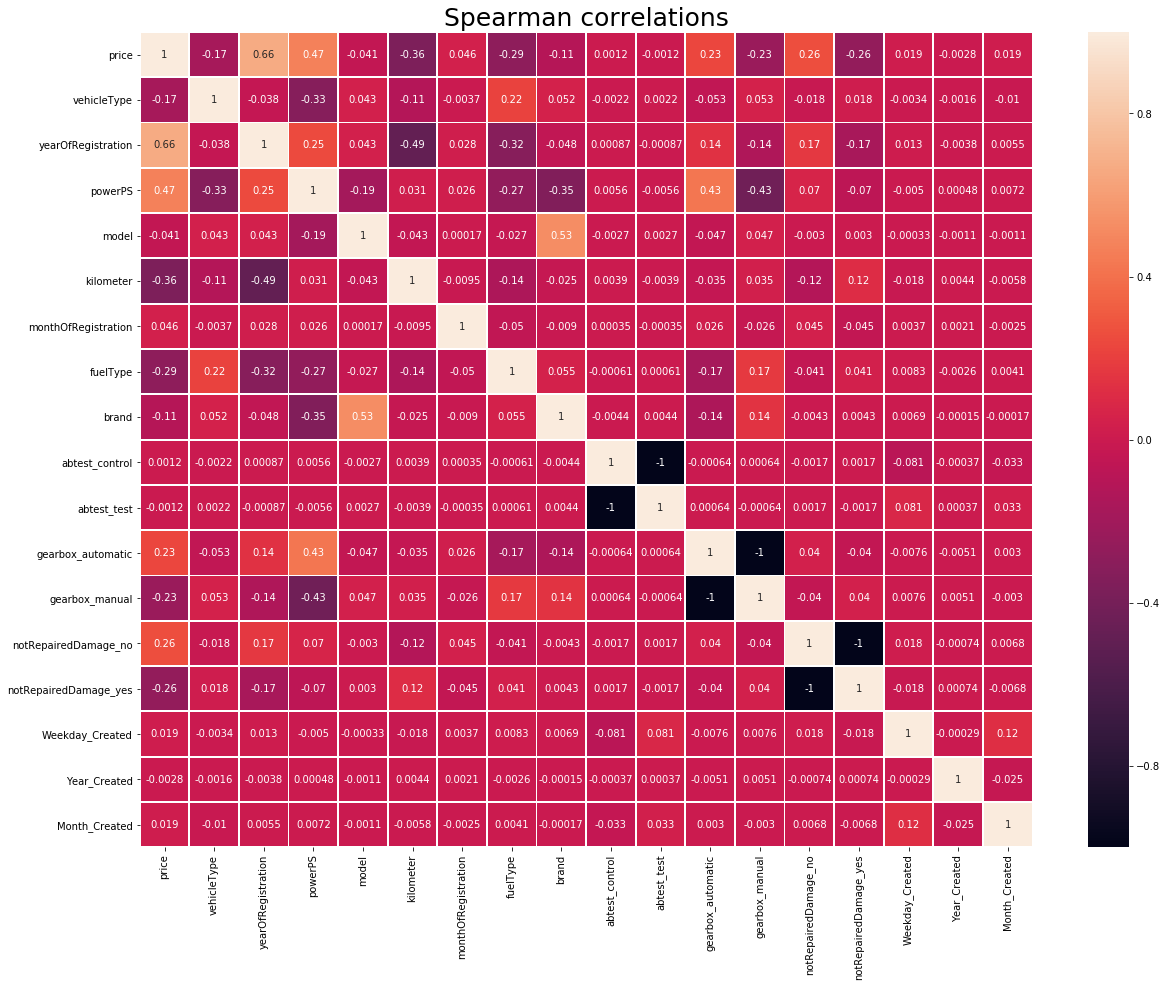

In [192]:
plt.figure(figsize = (20, 15))

sns.heatmap(spearman_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Spearman correlations', fontsize=25)

plt.show()

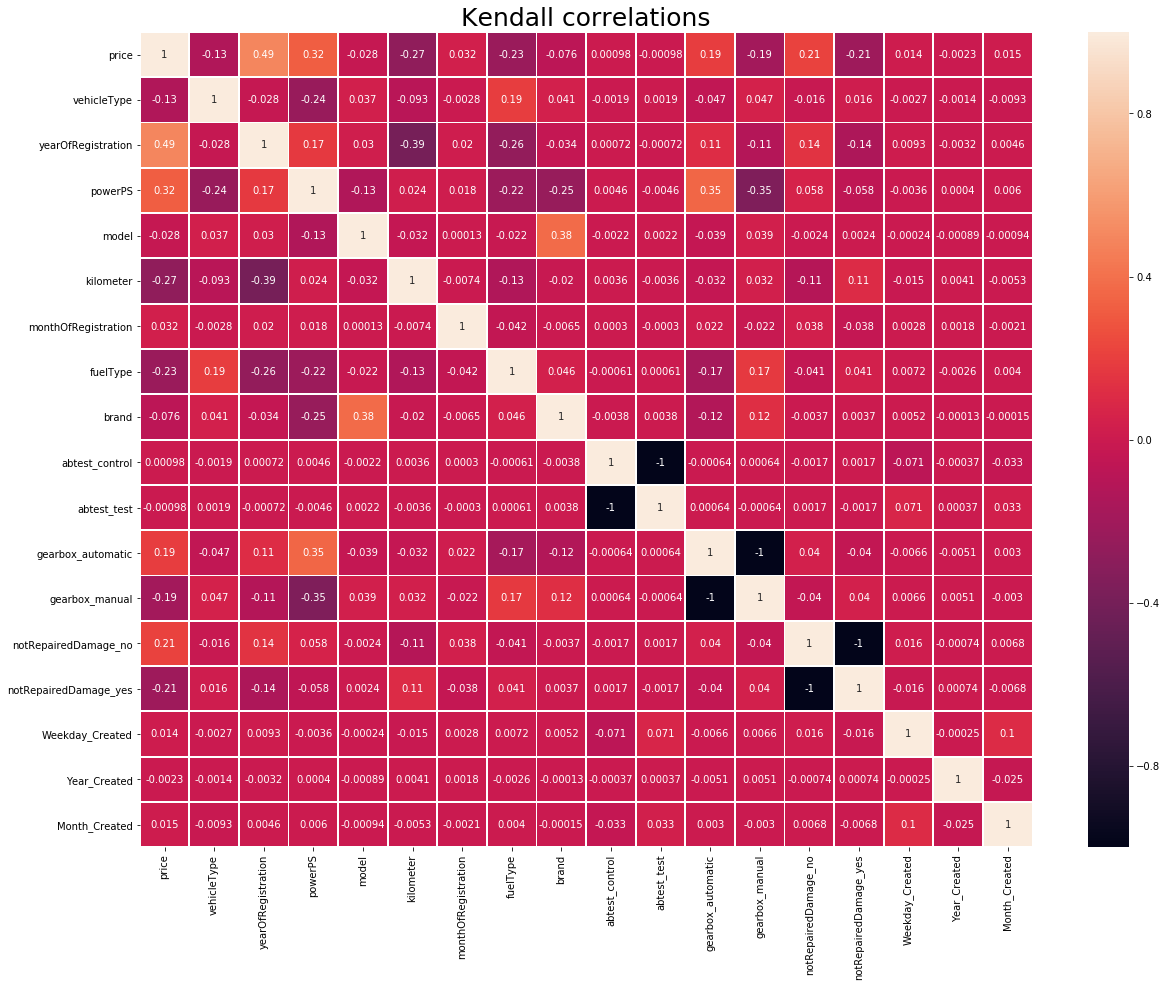

In [193]:
kendall_corr = auto_data.corr(method='kendall')

plt.figure(figsize = (20, 15))

sns.heatmap(kendall_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Kendall correlations', fontsize=25)

plt.show()

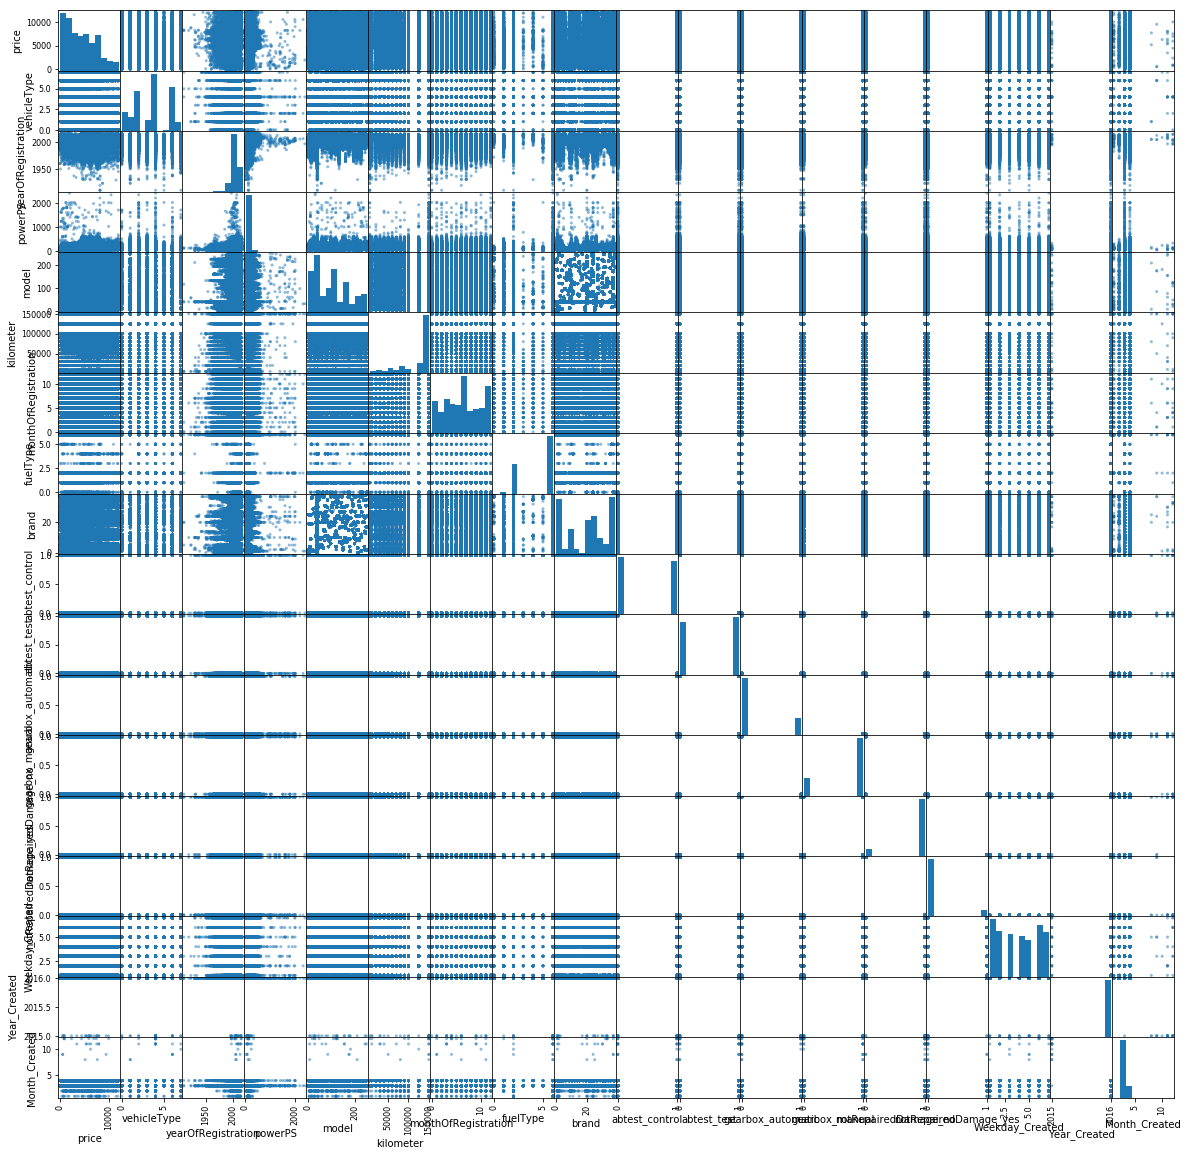

In [194]:
# scatter plot matrix
scatter_matrix(auto_data, figsize=(20, 20))
pyplot.show()

### Split Dataset into train and test set

In [195]:
X = auto_data.drop('price', axis=1)

# Taking the labels (price)
Y = auto_data['price']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Feature Importance 

You can get the feature importance of each feature of this dataset by using the feature importance property of the model.

`Feature importance` gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with `Tree Based Classifiers`, we will be using `Extra Tree Classifier` for extracting the top `13 features` for the dataset.

In [196]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor()

clf.fit(X,Y)

print(clf.feature_importances_) #use inbuilt class


[6.50632281e-02 2.95795034e-01 1.31545773e-01 4.81004853e-02
 1.29365530e-01 5.19963028e-02 7.44746683e-02 6.63932854e-02
 9.03960639e-03 9.00387722e-03 3.02225163e-02 5.34614458e-03
 2.07376126e-02 9.14205229e-03 4.12997438e-02 1.05165002e-05
 1.24636233e-02]


In [197]:
# Print the name and gini importance of each feature
for feature in zip(X, clf.feature_importances_):
    print(feature)

('vehicleType', 0.06506322807424693)
('yearOfRegistration', 0.29579503404608265)
('powerPS', 0.13154577320559127)
('model', 0.048100485280116886)
('kilometer', 0.12936552984491523)
('monthOfRegistration', 0.05199630284849782)
('fuelType', 0.0744746683207145)
('brand', 0.0663932853600768)
('abtest_control', 0.009039606394845764)
('abtest_test', 0.009003877219488374)
('gearbox_automatic', 0.03022251634852205)
('gearbox_manual', 0.005346144583093606)
('notRepairedDamage_no', 0.02073761264395744)
('notRepairedDamage_yes', 0.009142052293733788)
('Weekday_Created', 0.041299743784074944)
('Year_Created', 1.0516500217379493e-05)
('Month_Created', 0.012463623251824582)


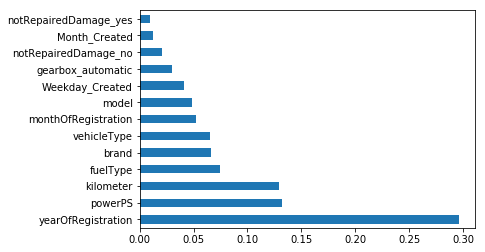

In [198]:
# # feature_importances of tree based classifiers
# # plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

#### Visualize the feature correlations

In [199]:
!pip install yellowbrick --upgrade

Requirement already up-to-date: yellowbrick in c:\users\sillians\anaconda3\lib\site-packages (1.1)


Visualize the correlation of the dependent variable with the features

We begin with the numeric features

In [200]:
target = Y

features = X

* __Graphical representation of pearson correlation __

In [201]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

#### The default correlation calculated is the Pearson correlation

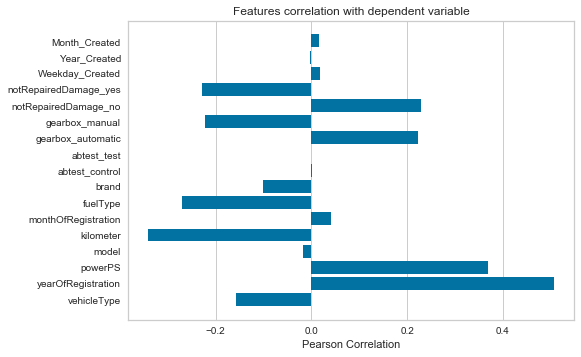

In [202]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()

In [203]:
X_train.shape, Y_train.shape

((208764, 17), (208764,))

In [204]:
x_test.shape, y_test.shape

((52192, 17), (52192,))

In [205]:
X_train.head(3)

,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,notRepairedDamage_no,notRepairedDamage_yes,Weekday_Created,Year_Created,Month_Created
22762,1.0,1988,98.0,118.0,150000,3,6.0,37.0,0,1,0,1,1,0,2,2016,3
153931,0.0,2002,114.0,37.0,125000,8,6.0,23.0,1,0,0,1,1,0,4,2016,3
203985,2.0,2012,105.0,171.0,150000,8,2.0,37.0,0,1,0,1,1,0,3,2016,3


In [206]:
Y_train

22762      4350.00
153931     1495.00
203985    11900.00
113313     2300.00
152390      700.00
            ...   
176963      649.00
117952     1700.00
173685     5890.47
43567     10500.00
199340     4500.00
Name: price, Length: 208764, dtype: float64

# Let's start building models

In [207]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

## RFE with RandomForestRegressor

In [208]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor(n_estimators = 50, random_state=42)
rfe = RFE(estimator, n_features_to_select=10, step=1)
rfe.fit(X_train,  Y_train)

rfe.support_    # The mask of selected features.

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False])

In [209]:
rfe.score(X_train, Y_train)   # Score on train set

0.9566226484049165

In [210]:
# The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
# Selected (i.e., estimated best) features are assigned rank 1.

rfe.ranking_

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 7, 2, 1, 6, 1, 8, 3])

In [211]:
print(X_train.columns[rfe.support_])

Index(['vehicleType', 'yearOfRegistration', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'brand', 'abtest_control',
       'notRepairedDamage_no', 'Weekday_Created'],
      dtype='object')


In [212]:
y_pred_rf = rfe.predict(x_test)

In [213]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 1057.3977973898507
Mean Squared Error: 2403481.5659404937
Root Mean Squared Error: 1550.3166018399254


In [214]:
rfe.get_params     # Get parameters for the estimator

<bound method BaseEstimator.get_params of RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=50, n_jobs=None,
                                    oob_score=False, random_state=42, verbose=0,
                                    warm_start=False),
    n_features_to_select=10, step=1, verbose=0)>

In [222]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred_rf})

pred_results.sample(5)

,y_test,y_pred
36686,5866.62,6183.00
28519,1000.00,1194.38
187294,8250.00,8434.64
214852,4090.00,7012.00
233415,7594.62,7316.55


In [224]:
import pickle

In [227]:
# Save Model
pickle.dump(rfe, open('models/randomforestregressor/model.pkl', 'wb'))

In [281]:
feature_list = list(X_train.columns)

In [282]:
pickle.dump(feature_list, open('features/featuresdata/features.pkl', 'wb'))

## RFE with Linear Regression

In [228]:
# Construct our Linear Regression model
lr = LinearRegression()
# lr.fit(X_train, Y_train)

#stop the search when only the last feature is left
rfe_lr = RFE(lr, n_features_to_select=10, step=1, verbose=3)
rfe_lr.fit(X_train, Y_train)

rfe_lr.support_    # The mask of selected features.

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


array([ True,  True, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True])

In [229]:
rfe_lr.score(X_train, Y_train)

0.3303762065766662

In [230]:
rfe_lr.ranking_

array([1, 1, 2, 7, 8, 3, 1, 6, 4, 5, 1, 1, 1, 1, 1, 1, 1])

In [231]:
print(X_train.columns[rfe_lr.support_])

Index(['vehicleType', 'yearOfRegistration', 'fuelType', 'gearbox_automatic',
       'gearbox_manual', 'notRepairedDamage_no', 'notRepairedDamage_yes',
       'Weekday_Created', 'Year_Created', 'Month_Created'],
      dtype='object')


In [232]:
y_pred_lr = rfe_lr.predict(x_test)

In [233]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 1925.6497262837938
Mean Squared Error: 6050443.732538469
Root Mean Squared Error: 2459.764975061331


In [234]:
# Save Model
pickle.dump(rfe_lr, open('models/linearregression/model.pkl', 'wb'))

## DecisionTreeRegressor

In [235]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=31, max_features=10, ccp_alpha=0.01)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.01, criterion='mse', max_depth=31,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [236]:
tree_reg.score(X_train, Y_train)

0.9916759999690306

In [237]:
y_pred_tree = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2062.4252459058216

In [238]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

Mean Absolute Error: 1325.7377020609424
Mean Squared Error: 4253597.894949689
Root Mean Squared Error: 2062.4252459058216


In [239]:
# Save Model
pickle.dump(rfe_lr, open('models/decisiontreeregressor/model.pkl', 'wb'))

## HistGradientBoostingRegressor

In [241]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

est = HistGradientBoostingRegressor(learning_rate=0.01, max_iter=500, max_depth=10)
est.fit(X_train, Y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.01,
                              loss='least_squares', max_bins=255, max_depth=10,
                              max_iter=500, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [242]:
est.score(X_train, Y_train)

0.7244255925318245

In [243]:
y_pred_hgbr = est.predict(x_test)

In [276]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_hgbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_hgbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_hgbr)))

Mean Absolute Error: 1128.0375974262035
Mean Squared Error: 2559609.448096564
Root Mean Squared Error: 1599.877947874951


In [277]:
# Save Model
pickle.dump(est, open('models/histgradientboostingregressor/model.pkl', 'wb'))

In [244]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(tree_reg, X_new_train, Y_train,
#                          scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)

In [245]:
# def display_scores(scores):
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())

# display_scores(tree_rmse_scores)

### Fitting Random Forest Regression to the Training set

In [246]:
# Fitting Random Forest Regression to the Training set

# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
# regressor.fit(X_train, Y_train)

In [247]:
# Score on the training set
# regressor.score(X_train, Y_train)

In [248]:
# Predicting the Test set results
# y_pred = regressor.predict(X_test)

In [249]:
# 
# print(accuracy_score(y_test, y_pred))

In [250]:
# Evaluating the Algorithm
# from sklearn import metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## SGDRegressor

In [251]:
# sgd_reg = SGDRegressor(random_state=42)
# sgd_reg.fit(X_train, y_train)
# y_pred_sgd = sgd_reg.predict(X_test)
# print(accuracy_score(y_test, y_pred_sgd))

### Feature Scaling

One of the most important transformations you need to apply to your data is `feature scaling`. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

* There are two common ways to get all attributes to have the same scale: **min-max scaling** and **standardization**.

**Min-max scaling** (many people call this `normalization`) is quite simple: values are shifted and rescaled so that they end up ranging from `0` to `1`. We do this by subtracting the `min value` and dividing by the `max` minus the `min`. Scikit-Learn provides a `transformer` called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that lets you change the range if you don’t want `0–1` for some reason.

**Standardization** is quite different: first it subtracts the `mean value` (so standardized values always have a `zero mean`), and then it divides by the `variance` so that the resulting distribution has `unit variance`. Unlike `min-max scaling`, `standardization` does not bound values to a `specific range`, which may be a problem for some algorithms (e.g., `neural networks often expect an input value ranging from 0 to 1`). However, `standardization` is much less affected by `outliers`. For example, suppose a district had a `median income` equal to 100 (by mistake). `Min-max scaling` would then crush all the other values from `0–15` down to `0–0.15`, whereas `standardization` would not be much affected. Scikit-Learn provides a transformer called `StandardScaler` for standardization.


* P/S: As with all the transformations, it is important to fit the scalers to the `training data only`, not to the `full dataset` (including the test set). Only then can you use them to transform the training set and the test set (and new data).

# Scaling dataset

In [252]:
# from sklearn.preprocessing import StandardScaler

# std_scaler = StandardScaler(copy=True, 
#                             with_mean=True, 
#                             with_std=True)

# X_train_std = std_scaler.fit_transform(X_train)
# X_train_std_auto = pd.DataFrame(X_train_std, columns = X_train.columns)

# x_test_std = std_scaler.transform(x_test)
# x_test_std_auto = pd.DataFrame(x_test_std, columns = x_test.columns)

In [253]:
# X_train_std_auto.head(3)

In [254]:
# X_train_std_auto.shape

In [255]:
# x_test_std_auto.head(3)

In [256]:
# x_test_std_auto.shape

#### Retrieve statistics for each column from the StandardScaler

In [257]:
# std_scaler.mean_

In [258]:
# std_scaler.var_

In [259]:
# X_train.values.shape

# Let's start building models

In [260]:
# from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb
# from sklearn.linear_model import SGDRegressor
# from sklearn.svm import SVR

# Define a cross validation strategy

The following code performs `K-fold cross-validation`: it randomly splits the `training set` into `10` distinct subsets called `folds`, then it `trains` and `evaluates` the `Decision Tree model 10 times`, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the `10 evaluation scores`:

In [261]:
#Validation function
# n_folds = 10


# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train_std_auto.values)
#     rmse= np.sqrt(-cross_val_score(model, X_train_std_auto.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

# get_n_splits == Returns the number of splitting iterations in the cross-validator

In [262]:
# def rmsle(y, y_pred):
#     return np.sqrt(mean_squared_error(y, y_pred))

# Ensembling LGBM, XGBoost and Gradient

Final Training and Prediction

# Gradient Boosting Regression :

With huber loss that makes it robust to outliers

In [263]:
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4,
#                                    min_samples_leaf=15, min_samples_split=15, 
#                                    loss='huber', random_state =5)

In [264]:
# GBoost.fit(X_train_std_auto, Y_train)

In [265]:
# gb_train_pred = GBoost.predict(x_test_std_auto)

In [266]:
# gb_pred = (GBoost.predict(x_test_std_auto.values))

In [267]:
# gb_pred = (GBoost.predict(x_test_std_auto.values))

In [268]:
# print(rmsle(y_test, gb_train_pred))

In [269]:
# y_test.shape

# XGBoost : :

In [270]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.52, gamma=0.03, 
#                              learning_rate=0.072, max_depth=6, 
#                              min_child_weight=2, n_estimators=2200,
#                              reg_alpha=0, reg_lambda=1,
#                              subsample=0.615, silent=1,
#                              random_state =7, nthread = -1)

In [271]:
# model_xgb.fit(X_train_std_auto, Y_train)
# xgb_train_pred = model_xgb.predict(x_test_std_auto)
# xgb_pred = model_xgb.predict(test)
# print(rmsle(y_train, xgb_train_pred))

# Light GBM : :

In [272]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=35,
#                               learning_rate=0.052, n_estimators=2800,feature_fraction = 0.75,
#                               feature_fraction_seed=9,min_data_in_leaf =15
                                                         
#                               )

In [273]:
# model_lgb.fit(train, y_train)
# lgb_train_pred = model_lgb.predict(train)

In [274]:
# print(rmsle(y_train, lgb_train_pred))

In [275]:
# lgb_pred = model_lgb.predict(test.values)